In [1]:
library(ggplot2)
library(tidyr)
library(vegan)
library(stringr)
devtools::load_all(("~/popPackage"))
library(NMF)
library(umap)
library(RColorBrewer)
library(GGally)
library(grid)
library(gridExtra) 
library(vegan)
library(reshape2)



colfunc <- colorRampPalette(c("white", "blue1", "purple","red")) # 
    


colorBlindBlack8  <- c("#000000", "#E69F00", "#56B4E9",
                                "lightpink1","#CC79A7", 
                       "#009E73", "#F0E442", "#0072B2", "#D55E00")
safe_colorblind_palette <- c("#88CCEE", "#CC6677", "#DDCC77",
                             "#117733", "#332288", "#AA4499", 
                             "#44AA99", "#999933", "#882255",
                             "purple", "blue1", "#888888")                       
                       


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-6

ℹ Loading GloScope
Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [OK] | Cores 2/2


Attaching package: ‘NMF’


The following object is masked from ‘package:testthat’:

    compare


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [38]:
load("../../results/BatchStudy/dist_mat_Perez2022.Rda")

In [39]:
meta = readRDS("../../data/Processed_Datasets/perezLupus/metadata/perezLupus_default_metadata.Rds")
meta <- unique(meta[, c("patient", "group", "sample", "batch")])
levels(meta$group)[which(levels(meta$group) == "na")] = "normal"
meta$group = str_to_title(meta$group)

#meta$batch_id = paste0(meta$donor_uuid, "_", meta$Processing_Cohort)
#levels(meta$disease_state)[which(levels(meta$disease_state) == "na")] = "normal"

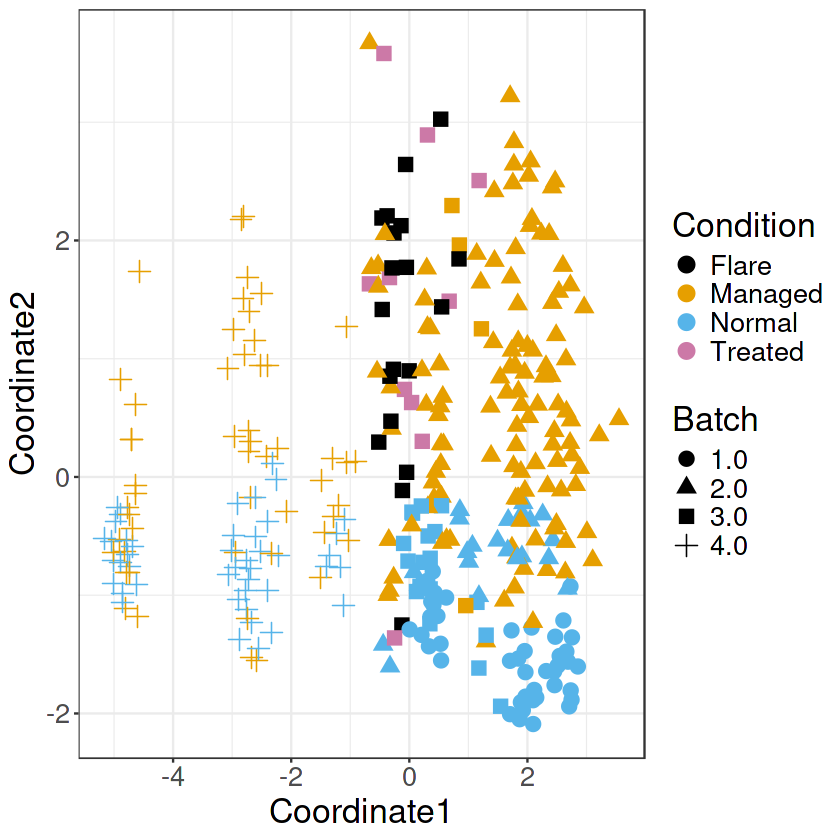

In [43]:
df = plotMDS(sqrt(dist_mat_GMM_PCA),k = 2, metadata_df = meta, sample_id = "sample", group_id = "group")$mds
ggplot(df, aes(x = Coordinate1, y = Coordinate2)) +
  geom_point(aes(col = group, shape = batch),
             size = 4)+
  theme_bw()+
  theme(text = element_text(size = 20))+
  labs(color = "Condition", shape = "Batch")+
  scale_color_manual(values=colorBlindBlack8[-4])+
      guides(color = guide_legend(order=1),
         shape = guide_legend(order=2))

In [47]:
meta$subs <- ifelse(meta$sample %in% test1, "Yes", "No")

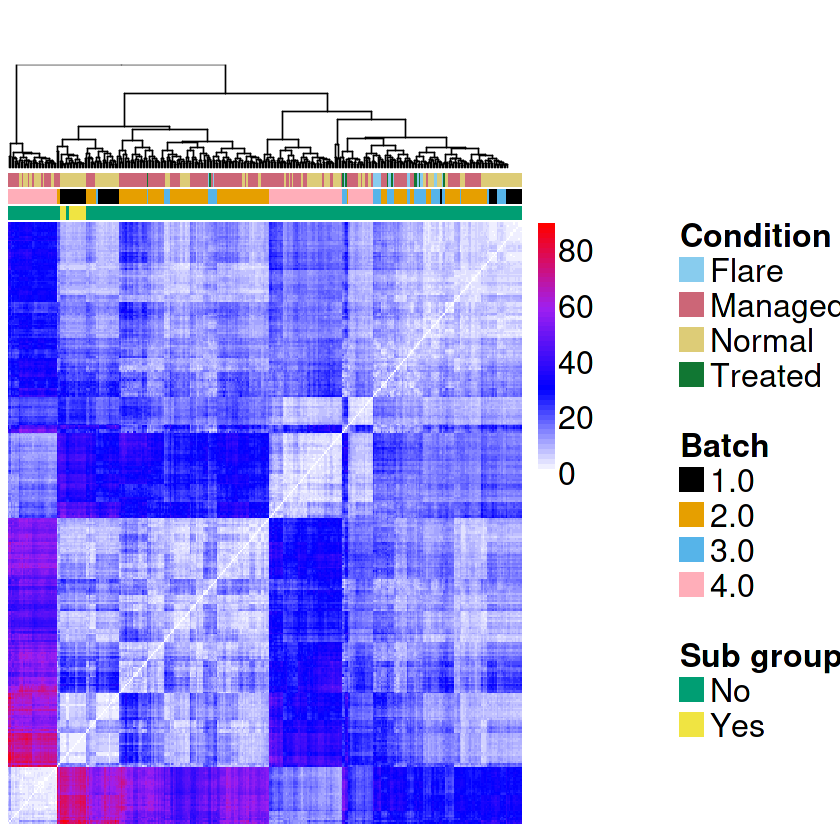

In [48]:
aheatmap(dist_mat_GMM_PCA, color = colfunc(51),
         annCol = list("Condition" = meta$group,
                       "Batch" = meta$batch,
                      "Sub group" = meta$subs),
         annColors = list('Condition' = c(safe_colorblind_palette, colorBlindBlack8[-3]),
                          "Batch" = colorBlindBlack8,
                         "Sub group" = colorBlindBlack8[6:7]),
         Colv = T, Rowv = FALSE,
         labRow = rep("", nrow(dist_mat_GMM_PCA)),
         labCol = rep("", nrow(dist_mat_GMM_PCA)),
         fontsize = 19, main = "",
         treeheight = 60)

In [4]:
df = plotMDS(sqrt(dist_mat_GMM_PCA),k = 2, metadata_df = meta, sample_id = "sample", group_id = "group")$mds
perez_legend = ggplot(df, aes(x = Coordinate1, y = Coordinate2)) +
  geom_point(aes(col = group, shape = batch),
             size = 4)+
  theme_bw()+
  theme(text = element_text(size = 20))+
  labs(color = "Condition", shape = "Batch")+
  scale_color_manual(values=colorBlindBlack8[-4])+
      guides(color = guide_legend(order=1),
         shape = guide_legend(order=2))
legend <- cowplot::get_legend(perez_legend)


pdf("../../results/fig/perez_legend.pdf", width = 2, height = 5)
grid.newpage()
grid.draw(legend)
dev.off()


Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


png 
  2

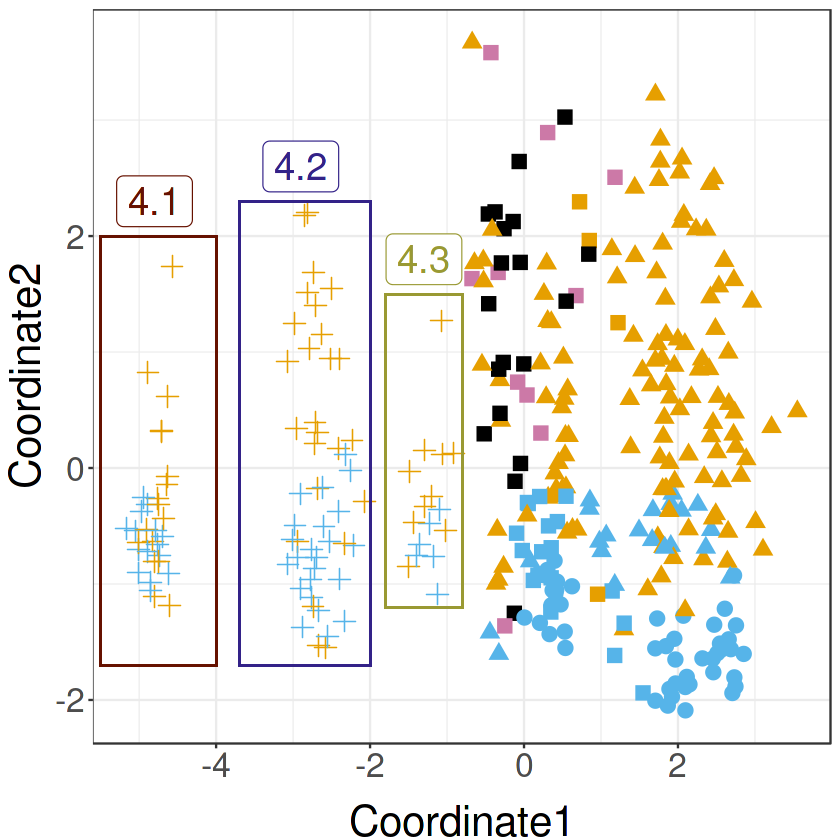

In [48]:
pdf("../../results/fig/perez_GMMpca_sqrt.pdf", width = 7, height = 6)
ggplot(df, aes(x = Coordinate1, y = Coordinate2), size = 2) +
  geom_point(aes(col = group, shape = batch),
             size = 4)+
  scale_color_manual(values=colorBlindBlack8[-4]) +
geom_rect(xmin =-5.5 , xmax = -4, ymin = -1.7, ymax = 2, fill = "transparent", color = "#661100")+
annotate("label", x = -4.8, y = 2.3, label = "4.1", color = "#661100", size = 8) +  
geom_rect(xmin =-3.7 , xmax = -2, ymin = -1.7, ymax = 2.3, fill = "transparent", color = "#332288")+
annotate("label", x = -2.9, y = 2.6, label = "4.2", color = "#332288", size = 8) +  
geom_rect(xmin =-1.8 , xmax = -0.8, ymin = -1.2, ymax = 1.5, fill = "transparent", color = "#999933")+
annotate("label", x = -1.3, y = 1.8, label = "4.3", color = "#999933", size = 8) +  
    theme_bw() +
  theme(text = element_text(size = 25),
        legend.position = "none",
        axis.title.x = element_text(vjust = -0.5))
dev.off()



In [44]:
test1 =df[which(df$Coordinate1>2.4 & df$group == "Normal" & df$batch == "1.0"),]$sample

In [45]:
sort(test1)

[1] 0a4bb8a3-0abf-46eb-a33c-c14a23d44387.1.0
 [2] 3be3bf0e-065c-4451-bdff-100e1f88b8d9.1.0
 [3] 3e17b93b-6d64-4b05-adf1-bee9b370788c.1.0
 [4] 6d32f89c-b5b9-4486-94f8-5368115f0408.1.0
 [5] 83a38413-11d1-494e-81d3-56f594148b71.1.0
 [6] 803fece6-2b2d-4ba2-8370-49385734ab3b.1.0
 [7] 27978e88-cfed-4b90-b622-fd572e5ea40d.1.0
 [8] 39824ee5-7478-4dc4-baad-9a90e3ca30ff.1.0
 [9] a3ef43c2-caad-4ca3-86d0-3c362e778877.1.0
[10] b0c3cf74-58cf-43e7-b4df-61ef0b3a9fdc.1.0
[11] b25deecf-dab2-4c86-ae98-047ee79ce320.1.0
[12] c896fdae-1a67-4c5e-b3f8-f4671744e35f.1.0
[13] e0d91e74-9836-43b7-b866-383398b2df70.1.0
[14] f0f0c7c0-c2dd-4f71-a15d-cc29ad1144b6.1.0
[15] f46fc513-1a40-4930-a9ee-c9c1da5de582.1.0
336 Levels: 0a4bb8a3-0abf-46eb-a33c-c14a23d44387.1.0 ...

In [14]:
library(ggforce)

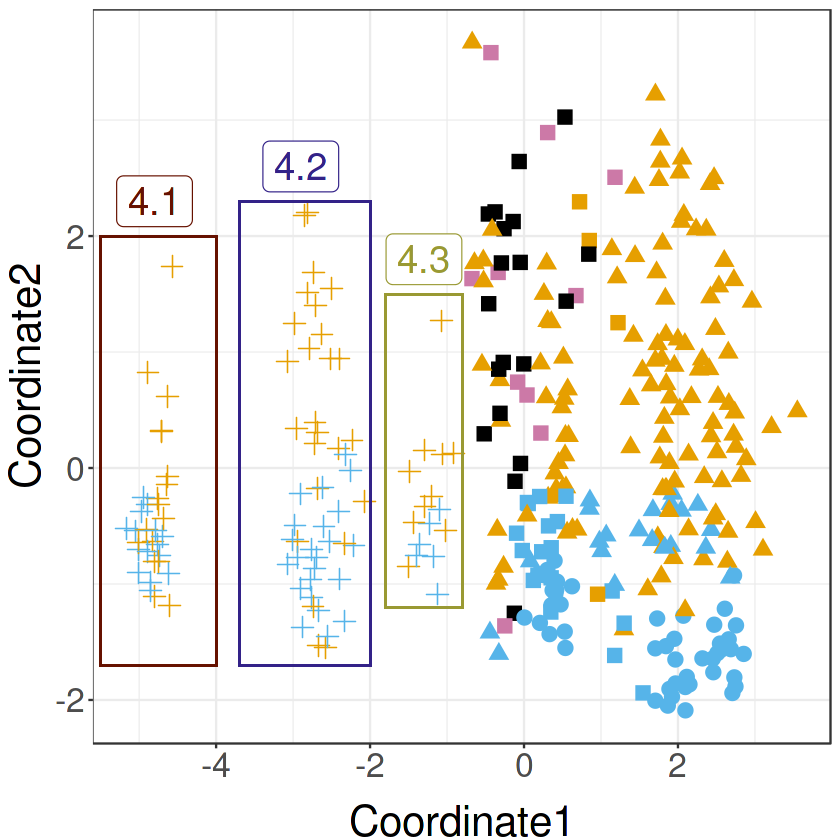

In [43]:
ggplot(df, aes(x = Coordinate1, y = Coordinate2), size = 2) +
  geom_point(aes(col = group, shape = batch),
             size = 4)+
  scale_color_manual(values=colorBlindBlack8[-4]) +
geom_rect(xmin =-5.5 , xmax = -4, ymin = -1.7, ymax = 2, fill = "transparent", color = "#661100")+
annotate("label", x = -4.8, y = 2.3, label = "4.1", color = "#661100", size = 8) +  
geom_rect(xmin =-3.7 , xmax = -2, ymin = -1.7, ymax = 2.3, fill = "transparent", color = "#332288")+
annotate("label", x = -2.9, y = 2.6, label = "4.2", color = "#332288", size = 8) +  
geom_rect(xmin =-1.8 , xmax = -0.8, ymin = -1.2, ymax = 1.5, fill = "transparent", color = "#999933")+
annotate("label", x = -1.3, y = 1.8, label = "4.3", color = "#999933", size = 8) +  
    theme_bw() +
  theme(text = element_text(size = 25),
        legend.position = "none",
        axis.title.x = element_text(vjust = -0.5))

In [4]:
df = plotMDS(sqrt(dist_mat_GMM_PCA),k = 10, metadata_df = meta, sample_id = "sample", group_id = "group")$mds

In [5]:
ss  <- silhouette(as.numeric(meta$batch), dist_mat_GMM_PCA)

In [6]:
get_ss <- function(meta, distmat, batch, group){
    ss_batch  <- silhouette(as.numeric(factor(meta[,batch])), distmat)
    ss_group  <- silhouette(as.numeric(factor(meta[,group])), distmat)
    
    return(list(batch = mean(ss_batch[,3]),
                group = mean(ss_group[,3])))
}

In [7]:
ss_pca <- get_ss(meta, dist_mat_GMM_PCA, "batch", "group")
ss_harsam <- get_ss(meta, dist_mat_GMM_har_sample, "batch", "group")
ss_harbat <- get_ss(meta, dist_mat_GMM_har_batch, "batch", "group")
ss_df <-data.frame(rbind(do.call(cbind, ss_pca),
              do.call(cbind, ss_harsam),
              do.call(cbind, ss_harbat)))
ss_df$comb <- c("PCA", "Harmony, Sample", "Harmony, Batch")

In [8]:
load("../../results/BatchStudy/Perez2022_BSss.Rda")
colnames(stat_list) <- paste0(rep(c("PCA", "Harmony, Sample", "Harmony, Batch"), each = 2),"_", colnames(stat_list))

In [11]:
head(stat_list)

PCA_batch,PCA_group,"Harmony, Sample_batch","Harmony, Sample_group","Harmony, Batch_batch","Harmony, Batch_group"
0.2799530,-0.04039250,0.07584935,0.06678960,0.0001383626,-0.021811968
0.2524039,-0.04288274,0.06466667,0.07212855,-0.0175905617,-0.007452109
0.2770147,-0.02784749,0.07338538,0.05964929,-0.0066776864,-0.015105477
0.2701222,-0.03387229,0.06929471,0.08167499,-0.0114782517,-0.008033178
0.2719071,-0.01423617,0.08605673,0.06355272,0.0027240456,-0.026768584
0.2703819,-0.05054044,0.09227778,0.06290290,-0.0136981612,-0.023898058


In [9]:
ss_qt <- apply(stat_list, 2, function(x) quantile(x, c(0.025,0.975)))

In [10]:
ss_qt

,PCA_batch,PCA_group,"Harmony, Sample_batch","Harmony, Sample_group","Harmony, Batch_batch","Harmony, Batch_group"
2.5%,0.2375727,-0.12788961,0.05956974,0.05147239,-0.025177785,-6.483196e-02
97.5%,0.2822153,-0.01903193,0.09485841,0.09141251,0.007667972,-1.499636e-05


In [11]:
library(reshape2)
ss_df_long <- melt(ss_df)
ss_df_long <- cbind(ss_df_long, t(ss_qt[,c(1,3,5,2,4,6)]))
ss_df_long
colnames(ss_df_long)[4:5] = c("Low.qt", "High.qt")
ss_df_long$comb <- factor(ss_df_long$comb, levels = unique(ss_df_long$comb))
ss_df_long$variable = ifelse(ss_df_long$variable == "batch", "Batch", "Condition")

Using comb as id variables



,comb,variable,value,2.5%,97.5%
,<chr>,<fct>,<dbl>,<dbl>,<dbl>
PCA_batch,PCA,batch,0.25832193,0.23757270,2.822153e-01
"Harmony, Sample_batch","Harmony, Sample",batch,0.07219194,0.05956974,9.485841e-02
"Harmony, Batch_batch","Harmony, Batch",batch,-0.01690678,-0.02517778,7.667972e-03
PCA_group,PCA,group,-0.06196753,-0.12788961,-1.903193e-02
"Harmony, Sample_group","Harmony, Sample",group,0.07174951,0.05147239,9.141251e-02
"Harmony, Batch_group","Harmony, Batch",group,-0.02593901,-0.06483196,-1.499636e-05


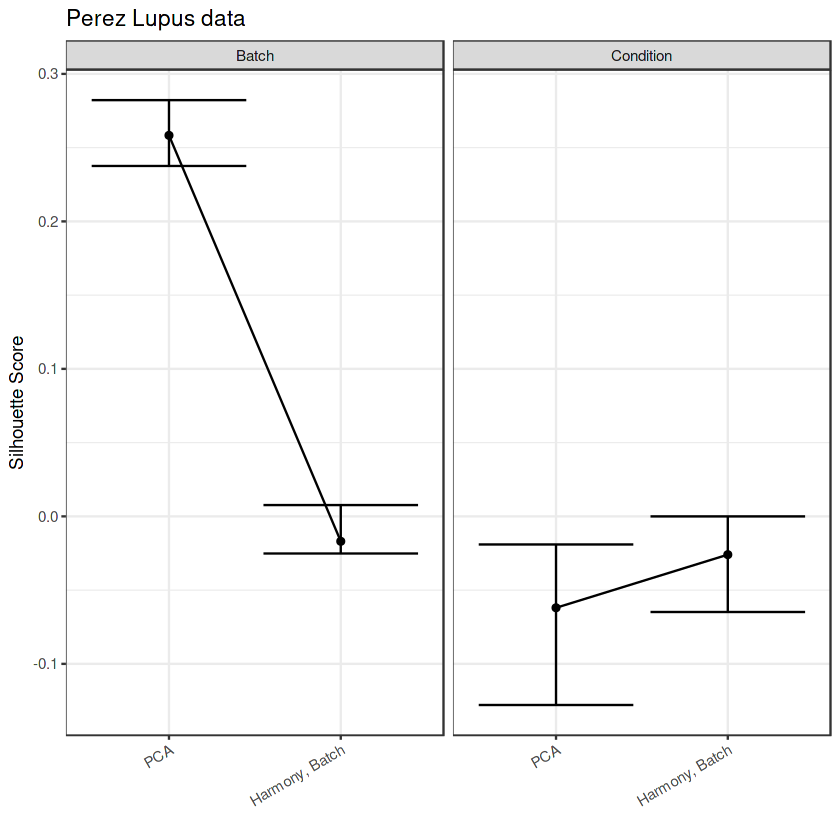

In [13]:
library(ggplot2)
colorBlindBlack8  <- c("#000000", "#E69F00", "#56B4E9",
                                "lightpink1","#CC79A7", 
                       "#009E73", "#F0E442", "#0072B2", "#D55E00")
safe_colorblind_palette <- c("#88CCEE", "#CC6677", "#DDCC77",
                             "#117733", "#332288", "#AA4499", 
                             "#44AA99", "#999933", "#882255",
                             "purple", "blue1", "#888888")   
ggplot(ss_df_long[ss_df_long$comb != "Harmony, Sample",], aes(x = comb, y = value, group = variable))+
  geom_point()+
  geom_line() +
    scale_color_manual(values= safe_colorblind_palette)+
    geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
  theme_bw() +
  facet_grid(~variable)+
  ylab("Silhouette Score")+
      theme(axis.text.x = element_text(angle = 30, hjust=1))+
  ggtitle("Perez Lupus data") +
xlab("")

In [14]:
pdf("../../results/fig/perez_ss.pdf", width = 7, height = 6)
ggplot(ss_df_long[ss_df_long$comb != "Harmony, Sample",], aes(x = comb, y = value, group = variable))+
  geom_point(size = 3)+
  geom_line() +
    scale_color_manual(values= safe_colorblind_palette)+
    geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
  theme_bw() +
  facet_grid(~variable)+
  ylab("Silhouette Score")+
  theme(text = element_text(size = 25),
        axis.text.x = element_text(angle = 30, hjust=1))+
xlab("")
dev.off()

png 
  2

In [15]:
load("../../results/BatchStudy/Perea2022_stat_summary.Rda")

In [123]:
ls()

[1] "colfunc"                 "colorBlindBlack8"       
 [3] "df"                      "dist_mat_GMM_har_batch" 
 [5] "dist_mat_GMM_har_sample" "dist_mat_GMM_PCA"       
 [7] "dist_mat_KNN_har_batch"  "dist_mat_KNN_har_sample"
 [9] "dist_mat_KNN_PCA"        "get_ss"                 
[11] "legend"                  "meta"                   
[13] "O2_data_all"             "perez_legend"           
[15] "R_data_all"              "safe_colorblind_palette"
[17] "ss"                      "ss_batch"               
[19] "ss_df"                   "ss_df_long"             
[21] "ss_group"                "ss_harbat"              
[23] "ss_harsam"               "ss_pca"                 
[25] "ss_qt"                   "stat_list"

In [16]:
head(R_data_all)
tmp <- R_data_all[R_data_all$Dens == "GMM" & R_data_all$Correction == "PCA",]

,DimReduc,Group,Dens,Correction,Value,comb,data,sd,Low.qt,High.qt,batch
,<fct>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,Original,Batch,GMM,PCA,0.6497317,PCA_GMM,Perez2022,0.01811265,0.6108092,0.6855113,Batch
2,Original,Condition,GMM,PCA,0.1480562,PCA_GMM,Perez2022,0.01435293,0.1234923,0.1799792,Condition
3,Original,Batch,GMM,ScVI,0.6629526,ScVI_GMM,Perez2022,0.02352735,0.6263694,0.7162718,Batch
4,Original,Condition,GMM,ScVI,0.1608126,ScVI_GMM,Perez2022,0.01607141,0.1361926,0.1968076,Condition
5,Original,Batch,KNN,PCA,0.5542567,PCA_KNN,Perez2022,0.01981165,0.5151587,0.5928358,Batch
6,Original,Condition,KNN,PCA,0.1865262,PCA_KNN,Perez2022,0.01765900,0.1559572,0.2253448,Condition


In [17]:
levels(tmp$DimReduc) = c("PCA", "Harmony, Sample", "Harmony, Batch", "Harmony, New Batch")

In [18]:
tmp[1:6,]

,DimReduc,Group,Dens,Correction,Value,comb,data,sd,Low.qt,High.qt,batch
,<fct>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,PCA,Batch,GMM,PCA,0.64973172,PCA_GMM,Perez2022,0.01811265,0.61080916,0.68551129,Batch
2,PCA,Condition,GMM,PCA,0.14805619,PCA_GMM,Perez2022,0.01435293,0.12349234,0.17997920,Condition
9,"Harmony, Sample",Batch,GMM,PCA,0.23840689,PCA_GMM,Perez2022,0.02141605,0.20290260,0.28689960,Batch
10,"Harmony, Sample",Condition,GMM,PCA,0.21199467,PCA_GMM,Perez2022,0.02423221,0.17887857,0.26935001,Condition
17,"Harmony, Batch",Batch,GMM,PCA,0.04862240,PCA_GMM,Perez2022,0.01430684,0.02869290,0.08599291,Batch
18,"Harmony, Batch",Condition,GMM,PCA,0.08194134,PCA_GMM,Perez2022,0.01699557,0.05605126,0.12333580,Condition


In [20]:
pdf("../../results/fig_revise/perez_ans.pdf", width = 7, height = 6)
ggplot(tmp[c(1,2,5,6),], aes(x = DimReduc, y = Value, group = Group))+
  geom_point(size = 3)+
  geom_line() +
    scale_color_manual(values= safe_colorblind_palette)+
    geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
  theme_bw() +
  facet_grid(~Group)+
  ylab("ANOSIM Statistic")+
  theme(text = element_text(size = 25),
        axis.text.x = element_text(angle = 30, hjust=1))+
xlab("")
dev.off()

png 
  2

In [144]:
load("../../results/BatchStudy/perez_umap_update.Rda")
load("../../results/Perez2022/plot_df_batchupdate.Rda")

In [145]:
load("../../results/BatchStudy/Perez2022_subgroup_meta.Rda")

In [146]:
plot_df$batch_id <- paste0(plot_df$sample_uuid, plot_df$Processing_Cohort)

In [147]:

plot_df$subgroups <- meta$subgroup[match(plot_df$batch_id, meta$batch_id)]
perez_umap <- data.frame(pca_umap$layout, celltype = as.character(plot_df$author_cell_type), batch = plot_df$Processing_Cohort, group = plot_df$disease_state, subgroup = plot_df$subgroups)


In [170]:
perez_umap <- data.frame(pca_umap$layout, celltype = as.character(plot_df$author_cell_type), batch = plot_df$Processing_Cohort, group = plot_df$disease_state, subgroup = plot_df$subgroups)


In [171]:
perez_umap$subgroup = factor(perez_umap$subgroup)
levels(perez_umap$subgroup) = c('1.0','2.0','3.0','4.1','4.2','4.3')

In [172]:
sort_order = names(sort(-table(perez_umap[,"celltype"])))
perez_umap$celltype = factor(perez_umap$celltype, levels = sort_order)

In [173]:
perez_umap$subgroup = ifelse(perez_umap$subgroup == "1.0", "1.0\n(M=175,273)",
                            ifelse(perez_umap$subgroup == "2.0", "2.0\n(M=558,108)",
                                  ifelse(perez_umap$subgroup == "3.0", "3.0\n(M=155,034)", 
                                         ifelse(perez_umap$subgroup == "4.1", "4.1\n(M=125,957)",
                                               ifelse(perez_umap$subgroup == "4.2", "4.2\n(M=191,829)","4.3\n(M=57,475)")))))

In [174]:
perez_umap$batch = ifelse(perez_umap$batch == "1.0", "1.0\n(M=175,273)",
                            ifelse(perez_umap$batch == "2.0", "2.0\n(M=558,108)",
                                  ifelse(perez_umap$batch == "3.0", "3.0\n(M=155,034)", "4.0\n(M=375,261)")))

Warning message:
“Removed 1200 rows containing missing values or values outside the scale range
(`geom_raster()`).”


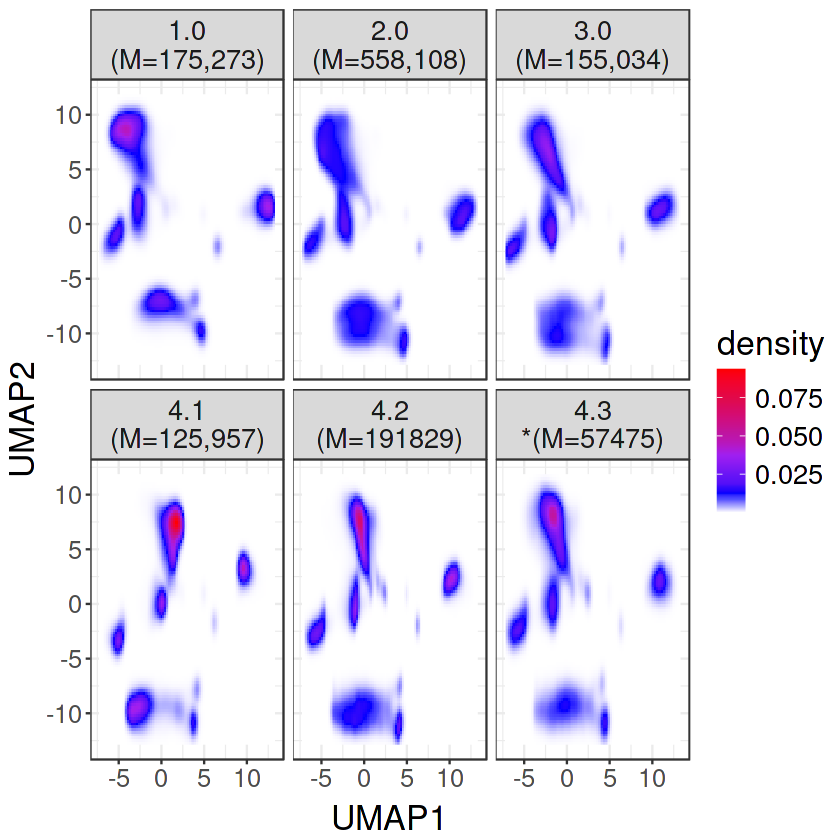

In [156]:
ggplot(perez_umap , aes(x = X1, y = X2)) +
   stat_density_2d(aes(fill = after_stat(density)), geom = "raster", contour = FALSE) +
  facet_wrap(~subgroup) +
scale_fill_gradientn(colours = colfunc(10),na.value = "white", values = c(0,0.1,0.2,0.5,1))+

  theme_bw() +
ylim(c(-13,12)) + xlab("UMAP1") +
  ylab("UMAP2")+
    theme(text=element_text(size=20),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15))

In [175]:
pdf("../../results/fig_revise/umap_Perez2022_density_update.pdf",width = 6.5, height = 6)
ggplot(perez_umap , aes(x = X1, y = X2)) +
   stat_density_2d(aes(fill = after_stat(density)), geom = "raster", contour = FALSE) +
  facet_wrap(~subgroup) +
scale_fill_gradientn(colours = colfunc(10),na.value = "white", values = c(0.001,0.1,0.2,0.5,1))+

  theme_bw() +
ylim(c(-13,12)) + xlab("UMAP1") +
  ylab("UMAP2")+
    theme(text=element_text(size=20),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15))

dev.off() 

Warning message:
“Removed 1200 rows containing missing values or values outside the scale range
(`geom_raster()`).”


png 
  2

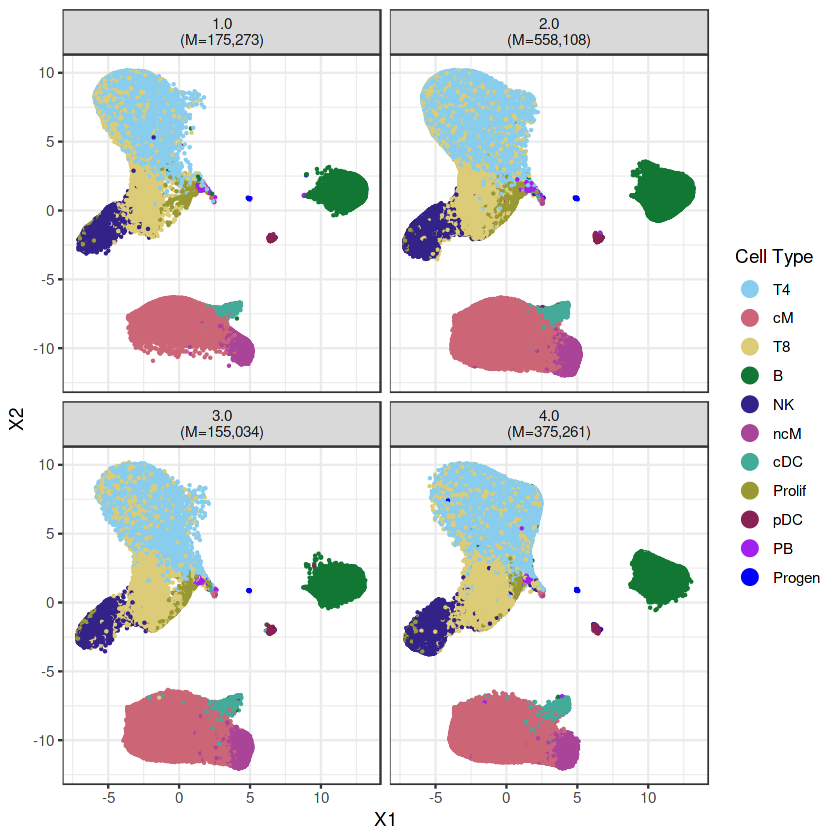

In [157]:

ggplot(perez_umap, aes(x = X1, y = X2)) +
  geom_point(aes(col= celltype), size = 0.2) +
  facet_wrap(~batch) +
  scale_color_manual(values = c(safe_colorblind_palette ))+
  theme_bw()+
  guides(colour = guide_legend(override.aes = list(size=4),
                               title = "Cell Type")) 

In [168]:
png("../../results/fig_revise/umap_Perez2022_update.png",width =600 , height = 600)
ggplot(perez_umap, aes(x = X1, y = X2)) +
  geom_point(aes(col= celltype), size = 0.2) +
  facet_wrap(~batch) +
  scale_color_manual(values = c(safe_colorblind_palette ))+
  theme_bw()+
  guides(colour = guide_legend(override.aes = list(size=4),
                               title = "Cell Type")) +
xlab("UMAP1") +
  ylab("UMAP2")+
    theme(text=element_text(size=20),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15))

dev.off() 

png 
  2

In [176]:
png("../../results/fig_revise/umap_Perez2022_sub_update.png",width =600 , height = 600)
ggplot(perez_umap, aes(x = X1, y = X2)) +
  geom_point(aes(col= celltype), size = 0.2) +
  facet_wrap(~subgroup) +
  scale_color_manual(values = c(safe_colorblind_palette ))+
  theme_bw()+
  guides(colour = guide_legend(override.aes = list(size=4),
                               title = "Cell Type")) +
xlab("UMAP1") +
  ylab("UMAP2")+
    theme(text=element_text(size=20),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15))

dev.off() 

png 
  2

In [51]:
sort_order = names(sort(-table(plot_df$author_cell_type)))

In [52]:
sort_order

[1] "T4"     "cM"     "T8"     "B"      "NK"     "ncM"    "cDC"    "Prolif"
 [9] "pDC"    "PB"     "Progen"

In [37]:
get_proportion <- function(meta, plot_df, group, celltype, sample){
rownames(meta) = meta[,sample]

sort_order = names(sort(-table(plot_df[,celltype])))
pct_df <- list()
for (c in unique(plot_df[,celltype])){
    # cat("\n\n### Cluster", c, "\n\n")
    plot_df$CurrentCluster <- plot_df[,celltype] == c
    
    cluster_sample <- tapply(plot_df$CurrentCluster, plot_df[,sample], sum) 
    cell_sample <- tapply(plot_df$CurrentCluster, plot_df[,sample], length) 
    
    current_meta <- as.data.frame(meta)
    current_meta <- current_meta[names(cell_sample),]
    current_meta$ClusterProp <- cluster_sample / cell_sample
    current_meta$this_cluster <- cluster_sample
    current_meta$n <- cell_sample
    current_meta <- as.data.frame(current_meta)
    current_meta$CellType <- c
      current_meta <- current_meta[order(current_meta[,group]),]
  rownames(current_meta) <- NULL
#  meta[,group] <- factor(meta[,group])
  current_meta$new_id <- paste0("sample", 1:nrow(current_meta))
    
    pct_df[[c]] <- current_meta
}

pct_df <- do.call("rbind", pct_df)
pct_df$CellType = factor(pct_df$CellType, levels = sort_order)
return(list(meta, pct_df))
}


In [109]:
plot_df = readRDS("../../data/Processed_Datasets/perezLupus/metadata/perezLupus_default_metadata.Rds")
#plot_df$interact <- paste0(plot_df$group, plot_df$batch)
plot_df$author_cell_type = as.character(plot_df$author_cell_type)
plot_df$sample = as.character(plot_df$sample)
plot_df$batch = as.character(plot_df$batch)
plot_df= plot_df[order(plot_df$batch),]
meta_old <- unique(plot_df[, c("group", "sample", "batch")])

In [131]:
test_old <- get_proportion(meta_old, plot_df, group = "batch", celltype = "author_cell_type", sample = "sample")

In [74]:
group.colors <- c(safe_colorblind_palette,colorBlindBlack8)[1:11]
names(group.colors) = sort(unique(perez_umap$celltype))

In [94]:
fake <- test_old

In [96]:
levels(fake[[2]]$CellType) = sort(unique(perez_umap$celltype))

In [97]:
cell_legend <- ggplot(data=fake[[2]], aes(x=factor(new_id, levels = unique(fake[[2]]$new_id)), y = ClusterProp, fill=CellType)) +
    geom_bar(stat="identity") + 
    facet_grid(~batch, scale = "free", space='free') +
    xlab("Sample") + ylab("Proportion") +
    scale_fill_manual(values=group.colors) +
  guides(colour = guide_legend(override.aes = list(size=4),
                               title = "Cell Type")) +
    theme_bw()+
    scale_x_discrete(expand = c(0, 1)) +
  theme(axis.text.x=element_blank(),
        text=element_text(size=20),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15),
       legend.position = "bottom")

In [103]:
table(perez_umap$batch)


   1.0    2.0    3.0    4.0 
175273 558108 155034 375261 

In [104]:
#test_old[[2]]$batch = ifelse(test_old[[2]]$batch == "1.0", "1.0\n(M=175,273)",
#                            ifelse(test_old[[2]]$batch == "2.0", "2.0\n(M=558,108)",
#                                  ifelse(test_old[[2]]$batch == "3.0", "3.0\n(M=155,034)", "4.0\n(M=375,261)")))

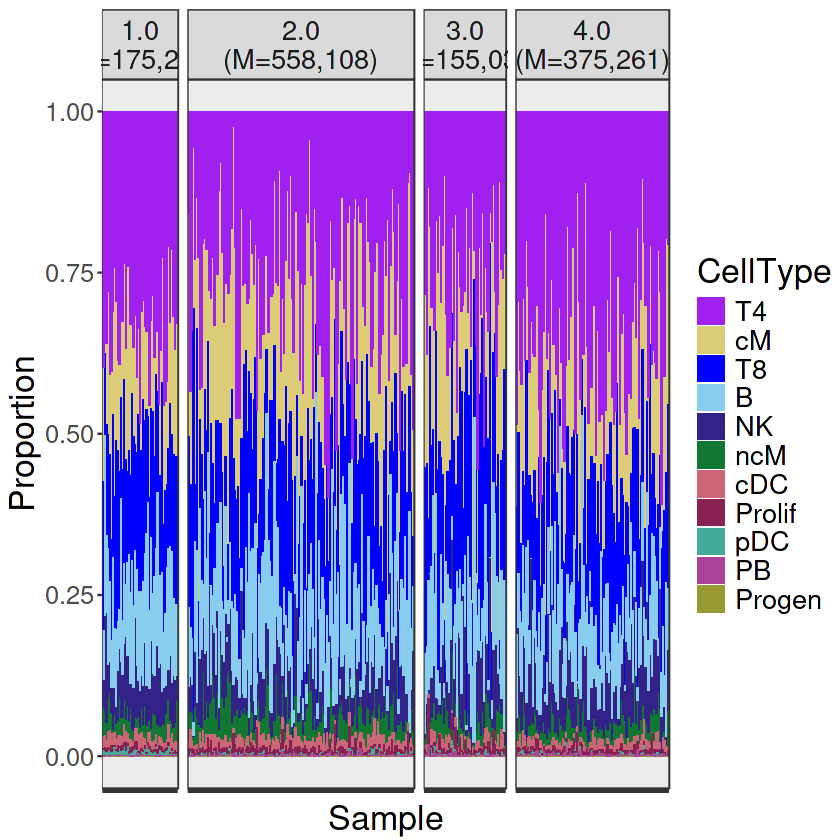

In [105]:
ggplot(data=test_old[[2]], aes(x=factor(new_id, levels = unique(test_old[[2]]$new_id)), y = ClusterProp, fill=CellType)) +
    geom_bar(stat="identity") + 
    facet_grid(~batch, scale = "free", space='free') +
    xlab("Sample") + ylab("Proportion") +
    scale_fill_manual(values=group.colors) +
  guides(colour = guide_legend(override.aes = list(size=4),
                               title = "Cell Type")) +
    theme_bw()+
    scale_x_discrete(expand = c(0, 1)) +
  theme(axis.text.x=element_blank(),
        text=element_text(size=20),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15))

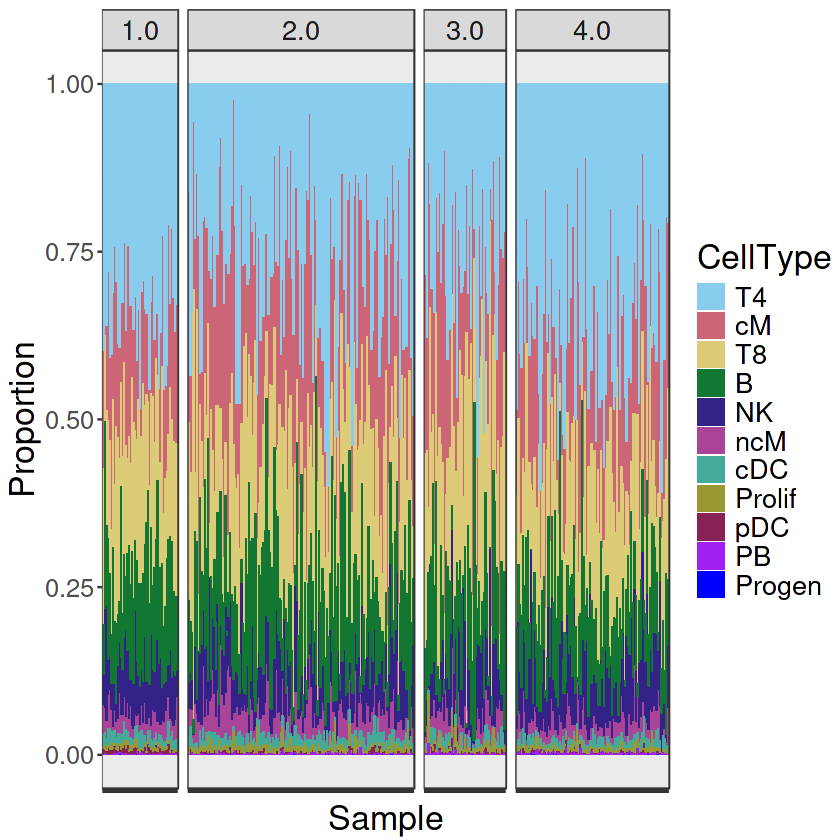

In [60]:
ggplot(data=test_old[[2]], aes(x=factor(new_id, levels = unique(test_old[[2]]$new_id)), y = ClusterProp, fill=CellType)) +
    geom_bar(stat="identity") + 
    facet_grid(~batch, scale = "free", space='free') +
    xlab("Sample") + ylab("Proportion") +
    scale_fill_manual(values = c(safe_colorblind_palette,colorBlindBlack8)) +
  guides(colour = guide_legend(override.aes = list(size=4),
                               title = "Cell Type")) +
    theme_bw()+
    scale_x_discrete(expand = c(0, 1)) +
  theme(axis.text.x=element_blank(),
        text=element_text(size=20),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15))

In [36]:
pdf("../../results/fig_revise/clusprop_Perez2022_old.pdf",width = 10, height = 8)

ggplot(data=test_old[[2]], aes(x=factor(new_id, levels = unique(test_old[[2]]$new_id)), y = ClusterProp, fill=CellType)) +
    geom_bar(stat="identity") + 
    facet_grid(~batch, scale = "free", space='free') +
    xlab("Sample") + ylab("Proportion") +
    scale_fill_manual(values=group.colors) +
  guides(colour = guide_legend(override.aes = list(size=4),
                               title = "Cell Type")) +
    theme_bw()+
    scale_x_discrete(expand = c(0, 1)) +
  theme(axis.text.x=element_blank(),
        text=element_text(size=20),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15))
dev.off()

png 
  2

In [132]:
pdf("../../results/fig_revise/clusprop_Perez2022_oldV2.pdf",width = 10, height = 8)

ggplot(data=test_old[[2]], aes(x=factor(new_id, levels = unique(test_old[[2]]$new_id)), y = ClusterProp, fill=CellType)) +
    geom_bar(stat="identity") + 
    facet_grid(~batch, scale = "free", space='free') +
    xlab("Sample") + ylab("Proportion") +
    scale_fill_manual(values=group.colors) +
  guides(colour = guide_legend(override.aes = list(size=4),
                               title = "Cell Type")) +
    theme_bw()+
    scale_x_discrete(expand = c(0, 1)) +
  theme(axis.text.x=element_blank(),
        text=element_text(size=15),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15))
dev.off()

png 
  2

In [127]:
load("../../results/BatchStudy/Perez2022_subgroup_meta.Rda")
meta$sample <- paste0(substr(meta$batch_id,1,nchar(meta$batch_id)-3), ".",meta$Processing_Cohort)
rownames(meta) = meta$sample
plot_df$subgroup <- meta$subgroup[match(plot_df$sample, meta$sample)]
plot_df_new = plot_df[order(plot_df$subgroup),]
meta_new <- unique(plot_df_new[, c("sample", "subgroup")])
test <- get_proportion(meta_new, plot_df_new, "subgroup", "author_cell_type", "sample")


In [128]:
test[[2]]$subgroup = factor(test[[2]]$subgroup)
levels(test[[2]]$subgroup) = c('1.0','2.0','3.0','4.1','4.2','4.3')

In [117]:
#test[[2]]$subgroup = ifelse(test[[2]]$subgroup == "1.0", "1.0\n(M=175,273)",
#                            ifelse(test[[2]]$subgroup == "2.0", "2.0\n(M=558,108)",
#                                  ifelse(test[[2]]$subgroup == "3.0", "3.0\n(M=155,034)", 
#                                         ifelse(test[[2]]$subgroup == "4.1", "4.1\n(M=125,957)",
#                                               ifelse(test[[2]]$subgroup == "4.2", "4.2\n(M=191829)","4.3\n*(M=57475)")))))

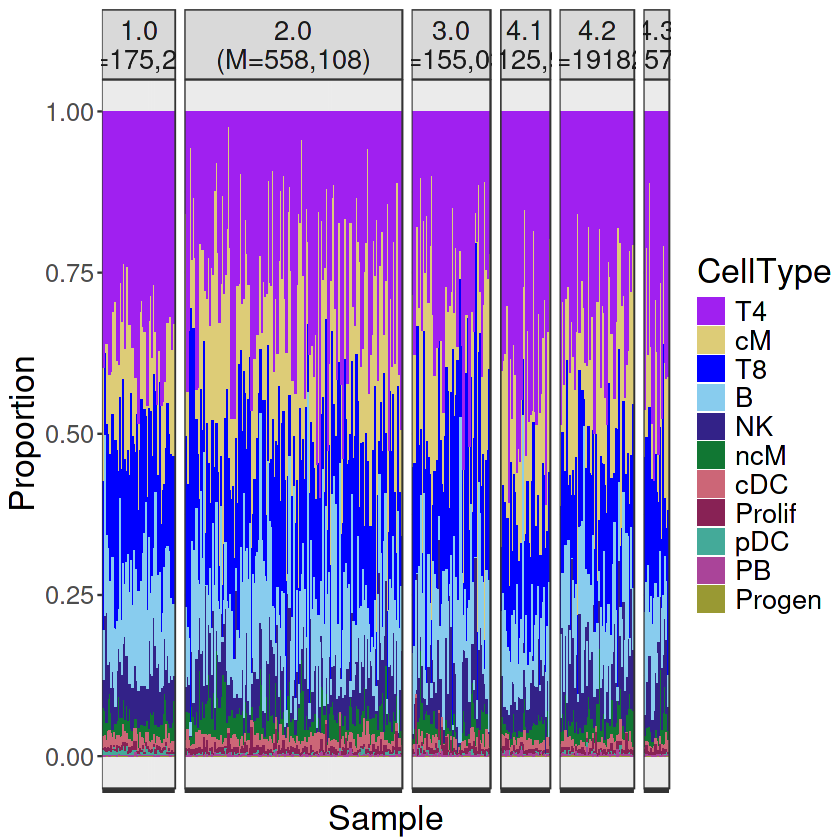

In [119]:
ggplot(data=test[[2]], aes(x=factor(new_id, levels = unique(test[[2]]$new_id)), y = ClusterProp, fill=CellType)) +
    geom_bar(stat="identity") + 
    facet_grid(~subgroup, scale = "free", space='free') +
    xlab("Sample") + ylab("Proportion") +
    scale_fill_manual(values = group.colors) +
  guides(colour = guide_legend(override.aes = list(size=4),
                               title = "Cell Type")) +
    theme_bw()+
    scale_x_discrete(expand = c(0, 1)) +
  theme(axis.text.x=element_blank(),
        text=element_text(size=20),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15))

In [129]:
pdf("../../results/fig_revise/clusprop_Perez2022_sub.pdf",width = 14, height = 8)

ggplot(data=test[[2]], aes(x=factor(new_id, levels = unique(test[[2]]$new_id)), y = ClusterProp, fill=CellType)) +
    geom_bar(stat="identity") + 
    facet_grid(~subgroup, scale = "free", space='free') +
    xlab("Sample") + ylab("Proportion") +
    scale_fill_manual(values = c(safe_colorblind_palette,colorBlindBlack8)) +
  guides(colour = guide_legend(override.aes = list(size=4),
                               title = "Cell Type")) +
    theme_bw()+
    scale_x_discrete(expand = c(0, 1)) +
  theme(axis.text.x=element_blank(),
        text=element_text(size=20),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15))
dev.off()

png 
  2

In [133]:
pdf("../../results/fig_revise/clusprop_Perez2022_subV2.pdf",width = 14, height = 8)

ggplot(data=test[[2]], aes(x=factor(new_id, levels = unique(test[[2]]$new_id)), y = ClusterProp, fill=CellType)) +
    geom_bar(stat="identity") + 
    facet_grid(~subgroup, scale = "free", space='free') +
    xlab("Sample") + ylab("Proportion") +
    scale_fill_manual(values = group.colors) +
  guides(colour = guide_legend(override.aes = list(size=4),
                               title = "Cell Type")) +
    theme_bw()+
    scale_x_discrete(expand = c(0, 1)) +
  theme(axis.text.x=element_blank(),
        text=element_text(size=20),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15))
dev.off()

png 
  2

In [72]:
plot_df <- readRDS("../../data/Processed_Datasets/fabreLiver/metadata/fabreLiver_default_metadata.Rds")
meta <- unique(plot_df[, c("sample", "patient", "group", "batch")])

load("../../results/BatchStudy/dist_mat_fabre_liver_update.Rda")


rownames(meta) <- as.character(meta$sample)
meta <- meta[rownames(dist_mat_GMM_PCA),]

In [73]:
meta$batch <- str_to_title(meta$batch)
meta$group <- str_to_title(meta$group)
meta$batch <- ifelse(meta$batch == "Andrews", "Andrews et al (2022)",
                    ifelse(meta$batch == "Guilliams", "Guilliams et al (2022)",
                          ifelse(meta$batch == "Macparland", "MacParland et al (2018)",
                                ifelse(meta$batch == "Ramachandran", "Ramachandran et al (2019)",
                                      ifelse(meta$batch == "Sharma", "Sharma et al (2020)",
                                            ifelse(meta$batch == "Zhao", "Zhao et al (2020)", "?"))))))

In [74]:
df = plotMDS(sqrt(dist_mat_GMM_PCA),k = 2, metadata_df = meta, sample_id = "sample", group_id = "group")$mds
perez_legend = ggplot(df, aes(x = Coordinate1, y = Coordinate2)) +
  geom_point(aes(col = group, shape = batch),
             size = 4)+
  theme_bw()+
  theme(text = element_text(size = 15))+
  labs(color = "Condition", shape = "Study")+
  scale_color_manual(values=colorBlindBlack8[-4])+
      guides(color = guide_legend(order=1),
         shape = guide_legend(order=2))
legend <- cowplot::get_legend(perez_legend)


Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


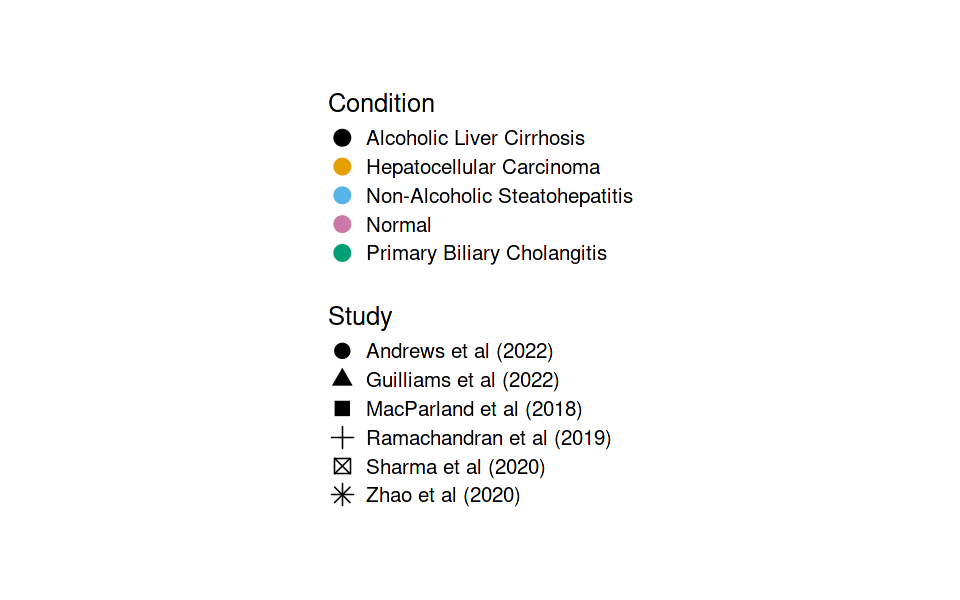

In [75]:
grid.draw(legend)

In [77]:
pdf("../../results/fig_revise/fabreliver_legend_update.pdf", width = 3, height = 4)
grid.newpage()
grid.draw(legend)
dev.off()

png 
  2

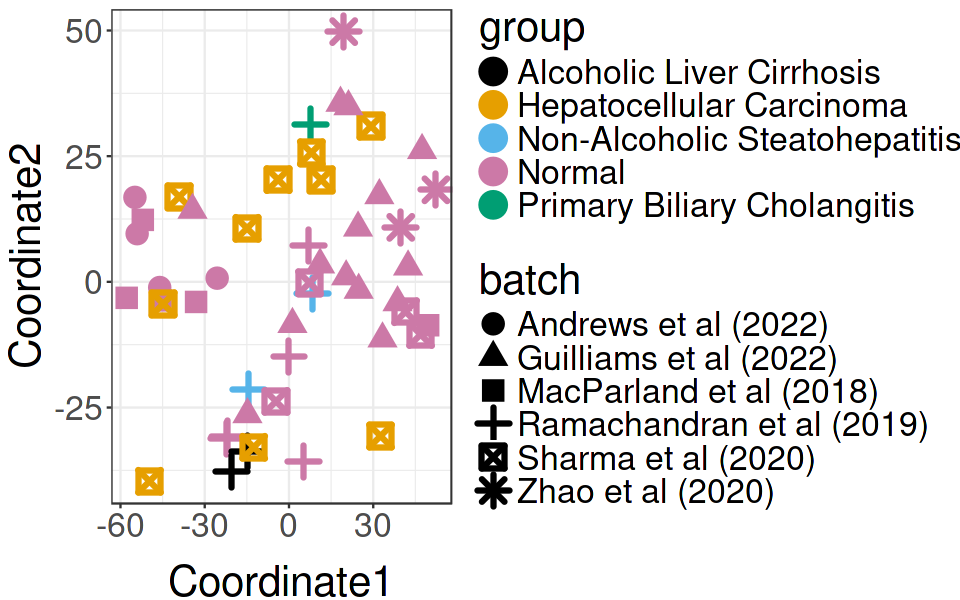

In [78]:
ggplot(df, aes(x = Coordinate1, y = Coordinate2), size = 2) +
  geom_point(aes(col = group, shape = batch),
             size = 5, stroke  = 2)+
  scale_color_manual(values=colorBlindBlack8[-4]) +
    theme_bw() +
  theme(text = element_text(size = 25),
        axis.title.x = element_text(vjust = -0.5))

In [80]:
pdf("../../results/fig_revise/fabreliver_GMMpca_sqrt_update.pdf", width = 7, height = 4)
ggplot(df, aes(x = Coordinate1, y = Coordinate2), size = 2) +
  geom_point(aes(col = group, shape = batch),
             size = 5, stroke  = 2)+
  scale_color_manual(values=colorBlindBlack8[-4]) +
    theme_bw() +
  theme(text = element_text(size = 25),
        axis.title.x = element_text(vjust = -0.5))
dev.off()

png 
  2

In [7]:
plot_df <- readRDS("../../data/Processed_Datasets/fabreLung/metadata/fabreLung_default_metadata.Rds")
meta <- unique(plot_df[, c("sample", "patient", "group", "batch")])

load("../../results/BatchStudy/dist_mat_fabre_lung_update.Rda")


rownames(meta) <- as.character(meta$sample)
meta <- meta[rownames(dist_mat_GMM_PCA),]


In [5]:
table(meta$batch, meta$group)

           
            chronic obstructive pulmonary disease normal pulmonary fibrosis
  adams                                        16     26                 32
  habermann                                     0     10                 12
  morse                                         0      7                  8
  reyfman                                       0      8                  4
  tatsuya                                       0      3                  3
  valenzi                                       0      1                  0
           
            pulmonary systemic sclerosis
  adams                                0
  habermann                            0
  morse                                0
  reyfman                              2
  tatsuya                              2
  valenzi                             10

In [8]:
meta$batch <- str_to_title(meta$batch)
meta$group <- str_to_title(meta$group)
meta$batch <- ifelse(meta$batch == "Morse", "Morse et al (2019)",
                    ifelse(meta$batch == "Reyfman", "Reyfman et al (2019)",
                          ifelse(meta$batch == "Valenzi", "Valenzi et al (2019)",
                                ifelse(meta$batch == "Tatsuya", "Tsukui et al (2020)",
                                      ifelse(meta$batch == "Habermann", "Habermann et al (2020)",
                                            ifelse(meta$batch == "Adams", "Adams et al (2020)", "?"))))))

In [9]:
df = plotMDS(sqrt(dist_mat_GMM_PCA),k = 2, metadata_df = meta, sample_id = "sample", group_id = "group")$mds
perez_legend = ggplot(df, aes(x = Coordinate1, y = Coordinate2)) +
  geom_point(aes(col = group, shape = batch),
             size = 4)+
  theme_bw()+
  theme(text = element_text(size = 15),legend.box = "horizontal")+
  labs(color = "Condition", shape = "Study")+
  scale_color_manual(values=colorBlindBlack8[-4])+
      guides(color = guide_legend(order=1),
         shape = guide_legend(order=2))
legend <- cowplot::get_legend(perez_legend)




Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


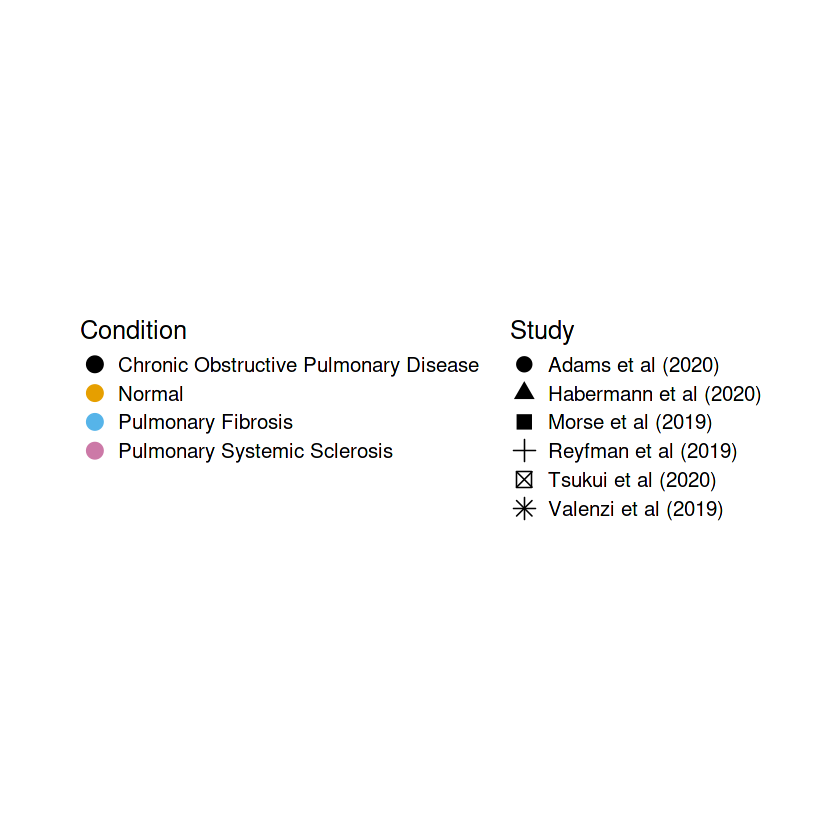

In [10]:
grid.draw(legend)

In [11]:
pdf("../../results/fig_revise/fabrelung_legend_update.pdf", width = 6, height = 2)
grid.newpage()
grid.draw(legend)
dev.off()

png 
  2

In [78]:
pdf("../../results/fig_revise/fabrelung_legend.pdf", width = 5, height =3.5)
grid.newpage()
grid.draw(legend)
dev.off()

png 
  2

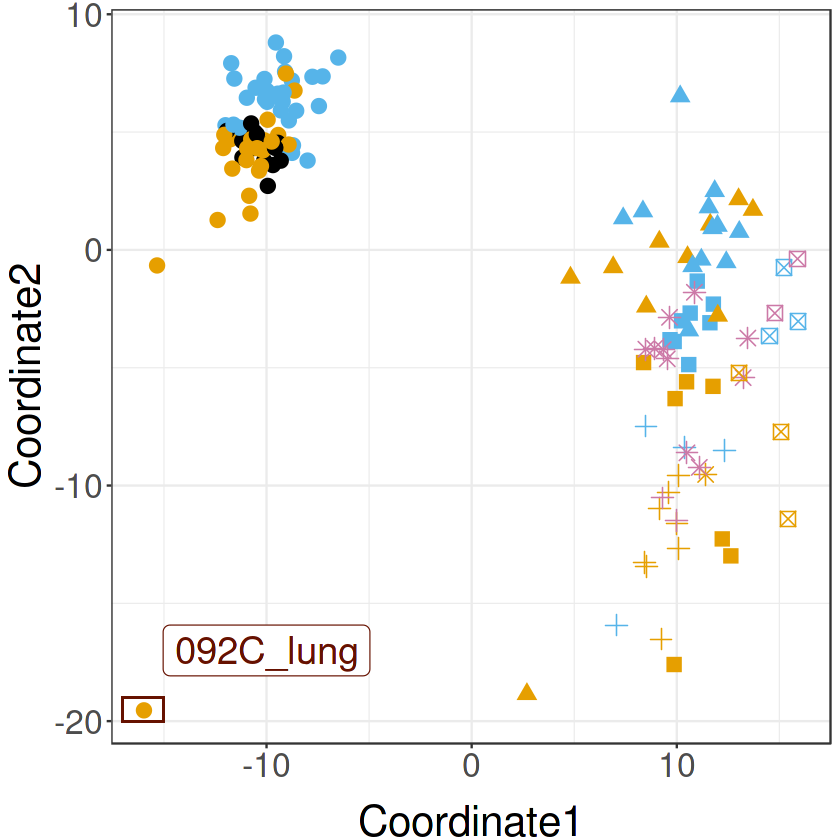

In [46]:
ggplot(df, aes(x = Coordinate1, y = Coordinate2), size = 2) +
  geom_point(aes(col = group, shape = batch),
             size = 4)+
  scale_color_manual(values=colorBlindBlack8[-4]) +
    theme_bw() +
  theme(text = element_text(size = 25),
        legend.position = "none",
        axis.title.x = element_text(vjust = -0.5))+
geom_rect(xmin =-17 , xmax = -15, ymin = -20, ymax = -19, fill = "transparent", color = "#661100")+
annotate("label", x = -10, y = -17, label = "092C_lung", color = "#661100", size = 8)

In [47]:
pdf("../../results/fig_revise/fabrelung_GMMpca_sqrt.pdf", width = 7, height = 6)
ggplot(df, aes(x = Coordinate1, y = Coordinate2), size = 2) +
  geom_point(aes(col = group, shape = batch),
             size = 4)+
  scale_color_manual(values=colorBlindBlack8[-4]) +
    theme_bw() +
  theme(text = element_text(size = 25),
        legend.position = "none",
        axis.title.x = element_text(vjust = -0.5))+
geom_rect(xmin =-17 , xmax = -15, ymin = -20, ymax = -19, fill = "transparent", color = "#661100")+
annotate("label", x = -10, y = -17, label = "092C_lung", color = "#661100", size = 8)
dev.off()


png 
  2

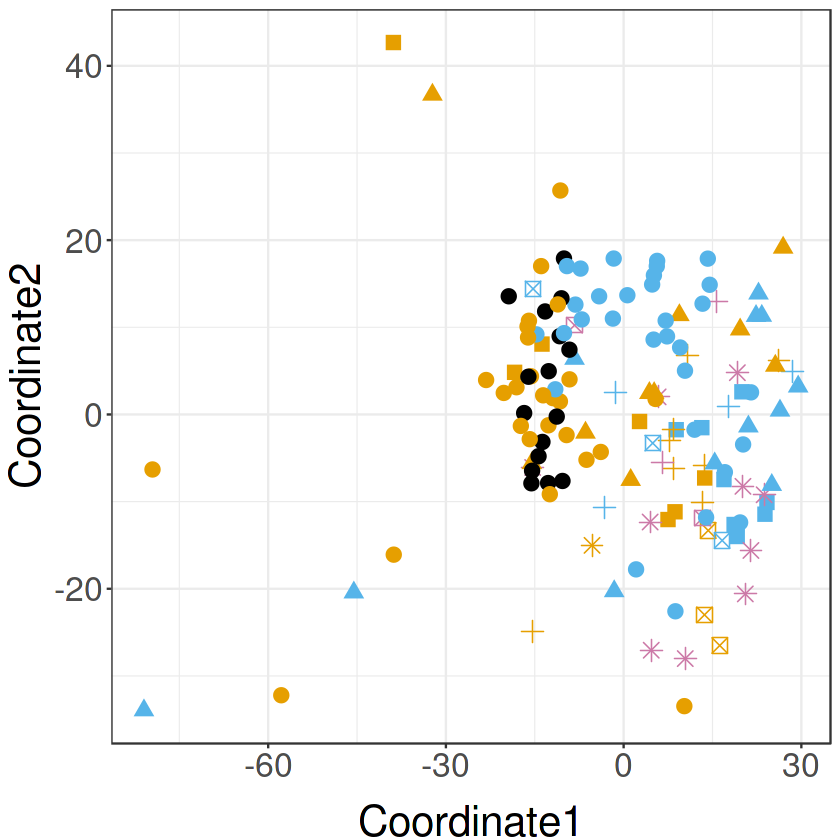

In [12]:
df <- plotMDS(sqrt(dist_mat_GMM_har_paper),k = 2, metadata_df = meta, sample_id = "sample", group_id = "group")$mds
ggplot(df, aes(x = Coordinate1, y = Coordinate2), size = 2) +
  geom_point(aes(col = group, shape = batch),
             size = 4)+
  scale_color_manual(values=colorBlindBlack8[-4]) +
    theme_bw() +
  theme(text = element_text(size = 25),
        legend.position = "none",
        axis.title.x = element_text(vjust = -0.5))

In [15]:
df["092C_lung",]

,sample,patient,group,batch,Coordinate1,Coordinate2
,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>
092C_lung,092C_lung,092C,Normal,Adams et al (2020),-79.52716,-6.313388


In [68]:
df <- plotMDS(sqrt(dist_mat_GMM_har_paper),k = 2, metadata_df = meta, sample_id = "sample", group_id = "group")$mds

pdf("../../results/fig_revise/fabrelung_GMMharbat_sqrt.pdf", width = 7, height = 6)
ggplot(df, aes(x = Coordinate1, y = Coordinate2), size = 2) +
  geom_point(aes(col = group, shape = batch),
             size = 4)+
  scale_color_manual(values=colorBlindBlack8[-4]) +
    theme_bw() +
  theme(text = element_text(size = 25),
        legend.position = "none",
        axis.title.x = element_text(vjust = -0.5))
dev.off()


png 
  2

In [48]:
get_ss <- function(meta, distmat, batch, group){
    ss_batch  <- silhouette(as.numeric(factor(meta[,batch])), distmat)
    ss_group  <- silhouette(as.numeric(factor(meta[,group])), distmat)
    
    return(list(batch = mean(ss_batch[,3]),
                group = mean(ss_group[,3])))
}

In [49]:
ss_pca <- get_ss(meta, dist_mat_GMM_PCA, "batch", "group")
ss_harsam <- get_ss(meta, dist_mat_GMM_har_sample, "batch", "group")
ss_harbat <- get_ss(meta, dist_mat_GMM_har_paper, "batch", "group")
ss_df <-data.frame(rbind(do.call(cbind, ss_pca),
              do.call(cbind, ss_harsam),
              do.call(cbind, ss_harbat)))
ss_df$comb <- c("PCA", "Harmony, Sample", "Harmony, Batch")

In [50]:
load("../../results/BatchStudy/fabreLung_BSss.Rda")
colnames(stat_list) <- paste0(rep(c("PCA", "Harmony, Sample", "Harmony, Batch"), each = 2),"_", colnames(stat_list))

In [51]:
ss_qt <- apply(stat_list, 2, function(x) quantile(x, c(0.025,0.975)))

In [52]:
library(reshape2)
ss_df_long <- melt(ss_df)
ss_df_long <- cbind(ss_df_long, t(ss_qt[,c(1,3,5,2,4,6)]))
ss_df_long
colnames(ss_df_long)[4:5] = c("Low.qt", "High.qt")
ss_df_long$comb <- factor(ss_df_long$comb, levels = unique(ss_df_long$comb))
ss_df_long$variable = ifelse(ss_df_long$variable == "batch", "Batch", "Condition")

Using comb as id variables



,comb,variable,value,2.5%,97.5%
,<chr>,<fct>,<dbl>,<dbl>,<dbl>
PCA_batch,PCA,batch,0.5082279,0.40063605,0.5334046
"Harmony, Sample_batch","Harmony, Sample",batch,0.2574868,0.09053695,0.3756095
"Harmony, Batch_batch","Harmony, Batch",batch,0.2485080,0.13066764,0.3374158
PCA_group,PCA,group,-0.4477032,-0.48535297,-0.4297957
"Harmony, Sample_group","Harmony, Sample",group,-0.2634337,-0.30232744,-0.1792183
"Harmony, Batch_group","Harmony, Batch",group,-0.2257108,-0.24172313,-0.1505521


In [53]:
ss_df_long

,comb,variable,value,Low.qt,High.qt
,<fct>,<chr>,<dbl>,<dbl>,<dbl>
PCA_batch,PCA,Batch,0.5082279,0.40063605,0.5334046
"Harmony, Sample_batch","Harmony, Sample",Batch,0.2574868,0.09053695,0.3756095
"Harmony, Batch_batch","Harmony, Batch",Batch,0.2485080,0.13066764,0.3374158
PCA_group,PCA,Condition,-0.4477032,-0.48535297,-0.4297957
"Harmony, Sample_group","Harmony, Sample",Condition,-0.2634337,-0.30232744,-0.1792183
"Harmony, Batch_group","Harmony, Batch",Condition,-0.2257108,-0.24172313,-0.1505521


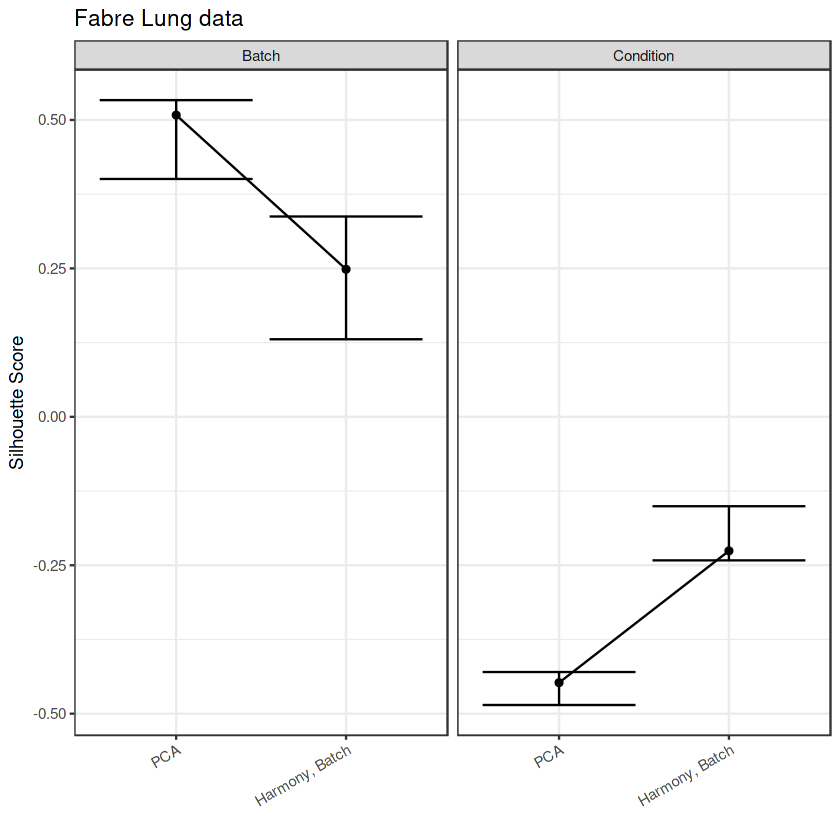

In [55]:
library(ggplot2)
colorBlindBlack8  <- c("#000000", "#E69F00", "#56B4E9",
                                "lightpink1","#CC79A7", 
                       "#009E73", "#F0E442", "#0072B2", "#D55E00")
safe_colorblind_palette <- c("#88CCEE", "#CC6677", "#DDCC77",
                             "#117733", "#332288", "#AA4499", 
                             "#44AA99", "#999933", "#882255",
                             "purple", "blue1", "#888888")   
ggplot(ss_df_long[c(1,3,4,6),], aes(x = comb, y = value, group = variable))+
  geom_point()+
  geom_line() +
    scale_color_manual(values= safe_colorblind_palette)+
    geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
  theme_bw() +
  facet_grid(~variable)+
  ylab("Silhouette Score")+
      theme(axis.text.x = element_text(angle = 30, hjust=1))+
  ggtitle("Fabre Lung data") +
xlab("")

In [57]:
pdf("../../results/fig_revise/fabreLung_ss.pdf", width = 7, height = 6)
ggplot(ss_df_long[c(1,3,4,6),], aes(x = comb, y = value, group = variable))+
  geom_point(size = 3)+
  geom_line() +
    scale_color_manual(values= safe_colorblind_palette)+
    geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
  theme_bw() +
  facet_grid(~variable)+
  ylab("Silhouette Score")+
  theme(text = element_text(size = 25),
        axis.text.x = element_text(angle = 30, hjust=1))+
xlab("")
dev.off()

png 
  2

In [8]:
load("../../results/BatchStudy/fabre_liver_stat_summary_update.Rda")
R_liver <- R_summary_fabre

In [9]:
load("../../results/BatchStudy/fabre_stat_summary_update.Rda")

In [10]:
R_lung <- R_summary_fabre

In [11]:
R_liver$dataset <- "Liver"
R_lung$dataset <- "Lung"

In [12]:
R_comb <- rbind(R_liver[1:2,], R_lung[1:2,])
head(R_comb)

,DimReduc,Group,Dens,Correction,Value,comb,data,sd,Low.qt,High.qt,dataset
,<fct>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,Original,Batch,GMM,"Harmony, PCA",0.62752767,"Harmony, PCA_GMM","Fabre, liver",0.05255095,0.59631225,0.7986677,Liver
2,Original,Condition,GMM,"Harmony, PCA",0.03641066,"Harmony, PCA_GMM","Fabre, liver",0.04539296,-0.05025571,0.1306792,Liver
3,Original,Batch,GMM,"Harmony, PCA",0.90876352,"Harmony, PCA_GMM","Fabre, lung",0.02803320,0.83388279,0.9400463,Lung
4,Original,Condition,GMM,"Harmony, PCA",0.09090559,"Harmony, PCA_GMM","Fabre, lung",0.01357906,0.07737763,0.1275550,Lung


In [15]:
pdf("../../results/fig_revise/fabre_ans_comb.pdf", width = 6, height = 5)
ggplot(R_comb[R_comb$Group == "Batch",], aes(x = dataset, y = Value, group = Group))+
  geom_point(aes(col = dataset), size = 5) +
    scale_color_manual(values= safe_colorblind_palette)+
    geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
  theme_bw() +
  facet_grid(~Group)+
  ylab("ANOSIM Statistic")+
  theme(text = element_text(size = 25),
        axis.text.x = element_text(angle = 30, hjust=1))+
xlab("")
dev.off()

png 
  2

In [25]:
tmp <- R_summary_fabre[R_summary_fabre$Dens == "GMM" & R_summary_fabre$Correction == "Harmony, PCA",]


In [26]:
levels(tmp$DimReduc) = c("PCA", "Harmony, Sample", "Harmony, Batch", "Harmony, New Batch")

In [27]:
head(tmp)

,DimReduc,Group,Dens,Correction,Value,comb,data,sd,Low.qt,High.qt
,<fct>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,PCA,Batch,GMM,"Harmony, PCA",0.90876352,"Harmony, PCA_GMM","Fabre, lung",0.02803320,0.83388279,0.9400463
2,PCA,Condition,GMM,"Harmony, PCA",0.09090559,"Harmony, PCA_GMM","Fabre, lung",0.01357906,0.07737763,0.1275550
9,"Harmony, Sample",Batch,GMM,"Harmony, PCA",0.76765156,"Harmony, PCA_GMM","Fabre, lung",0.04593695,0.65624843,0.8287447
10,"Harmony, Sample",Condition,GMM,"Harmony, PCA",0.06850331,"Harmony, PCA_GMM","Fabre, lung",0.01756290,0.05409214,0.1180984
17,"Harmony, Batch",Batch,GMM,"Harmony, PCA",0.76658263,"Harmony, PCA_GMM","Fabre, lung",0.04523770,0.64804879,0.8182059
18,"Harmony, Batch",Condition,GMM,"Harmony, PCA",0.10742482,"Harmony, PCA_GMM","Fabre, lung",0.01881989,0.09013544,0.1628769


In [28]:
pdf("../../results/fig_revise/fabreLung_ans.pdf", width = 7, height = 6)
ggplot(tmp[c(1,2,5,6),], aes(x = DimReduc, y = Value, group = Group))+
  geom_point(size = 3)+
  geom_line() +
    scale_color_manual(values= safe_colorblind_palette)+
    geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
  theme_bw() +
  facet_grid(~Group)+
  ylab("ANOSIM Statistic")+
  theme(text = element_text(size = 25),
        axis.text.x = element_text(angle = 30, hjust=1))+
xlab("")
dev.off()

png 
  2

In [134]:
load("../../results/BatchStudy/fabre_umap_lung.Rda")

In [3]:
plot_df$paper <- ifelse(plot_df$paper == "morse", "Morse et al (2019)",
                    ifelse(plot_df$paper == "reyfman", "Reyfman et al (2019)",
                          ifelse(plot_df$paper == "valenzi", "Valenzi et al (2019)",
                                ifelse(plot_df$paper == "tatsuya", "Tsukui et al (2020)",
                                      ifelse(plot_df$paper == "habermann", "Habermann et al (2020)",
                                            ifelse(plot_df$paper == "adams", "Adams et al (2020)", "?"))))))

In [108]:
head(plot_df)

,orig.ident,nCount_RNA,nFeature_RNA,NAME,biosample_id,donor_id,species,species__ontology_label,disease,disease__ontology_label,⋯,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,umap_1,umap_2
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCGTGGCGATT_1_1,fabreLung_default,1070,485,AAACCGTGGCGATT_1_1,sc14_lung,sc14,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,⋯,-0.13784494,0.2107480,-0.3105685,0.4602728,0.6355133,0.1905244,-0.2408590,0.65852484,0.7826306,1.378321
AAACTTGACAGTTG_1_1,fabreLung_default,915,380,AAACTTGACAGTTG_1_1,sc14_lung,sc14,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,⋯,0.02999632,-0.5305198,-0.2434557,0.8526952,-0.1794608,-1.1249011,-0.4406828,-0.75559386,0.0659904,1.591764
AAACTTGATCTCCG_1_1,fabreLung_default,604,278,AAACTTGATCTCCG_1_1,sc14_lung,sc14,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,⋯,0.98686429,-1.8224336,0.3302797,0.6541846,-0.8342956,-0.4312895,-0.2256918,-0.42539701,-0.1928573,3.168082
AAAGATCTTTACTC_1_1,fabreLung_default,9383,1618,AAAGATCTTTACTC_1_1,sc14_lung,sc14,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,⋯,-2.37295170,-1.1562504,2.4073865,0.8421751,0.2717155,1.6866768,-0.3137456,0.61912656,-2.8600119,-6.910175
AAAGGCCTAGAGAT_1_1,fabreLung_default,925,410,AAAGGCCTAGAGAT_1_1,sc14_lung,sc14,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,⋯,1.02653557,-0.6767779,0.2454212,2.9568046,-0.9958663,-0.6129250,-1.1716165,-0.01391033,0.3029301,1.757840
AAAGTTTGTGAAGA_1_1,fabreLung_default,1039,453,AAAGTTTGTGAAGA_1_1,sc14_lung,sc14,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,⋯,-1.25636700,-2.2271522,0.3443424,0.7032648,1.4838137,-0.8878748,1.6580807,0.25814031,-9.3673504,2.558278


In [101]:
plot_df$CellType = str_wrap(plot_df$cell_type__ontology_label,15)
sort_order = names(sort(-table(plot_df[,"CellType"])))
plot_df$CellType = factor(plot_df$CellType, levels = sort_order)


In [102]:
table(plot_df$CellType)


                                    myeloid cell 
                                          366041 
                                      lymphocyte 
                                           85217 
                             type II\npneumocyte 
                                           47173 
                              type I\npneumocyte 
                                           44121 
                                      fibroblast 
                                           43528 
                               endothelial\ncell 
                                           36345 
                                 epithelial cell 
                                           29957 
                                          B cell 
                                           22199 
                             smooth muscle\ncell 
                                           21471 
                                       mast cell 
                                            6997 

In [14]:
png("../../results/fig_revise/umap_fabrelung.png",width = 620, height = 800)
ggplot(plot_df, aes(x = umap_1, y = umap_2)) +
  geom_point(aes(col= CellType), size = 0.2) +
  facet_wrap(~paper) +
  scale_color_manual(values = c(safe_colorblind_palette,colorBlindBlack8 ))+
  theme_bw()+
  guides(colour = guide_legend(override.aes = list(size=4))) +
xlab("UMAP1")+
ylab("UMAP2")+
    theme(text=element_text(size=15),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15),
       legend.position = "bottom")
dev.off()

png 
  2

In [14]:
pdf("../../results/fig_revise/umap_fabrelung.pdf",width =600 , height = 400)
ggplot(plot_df, aes(x = umap_1, y = umap_2)) +
  geom_point(aes(col= CellType), size = 0.2) +
  facet_wrap(~paper) +
  scale_color_manual(values = c(safe_colorblind_palette,colorBlindBlack8 ))+
  theme_bw()+
  guides(colour = guide_legend(override.aes = list(size=4),
                               title = "Cell Type")) +
    theme(text=element_text(size=12),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15))
dev.off()

png 
  2

In [20]:
subplot = plot_df[plot_df$paper == "Adams et al (2020)",]
subplot$target = ifelse(subplot$biosample_id == "092C_lung", "Outlier (092C_lung)", "Others")


In [21]:
subplot$CellType = str_wrap(subplot$CellType,15)
sort_order = names(sort(-table(subplot[,"CellType"])))
subplot$CellType = factor(subplot$CellType, levels = sort_order)

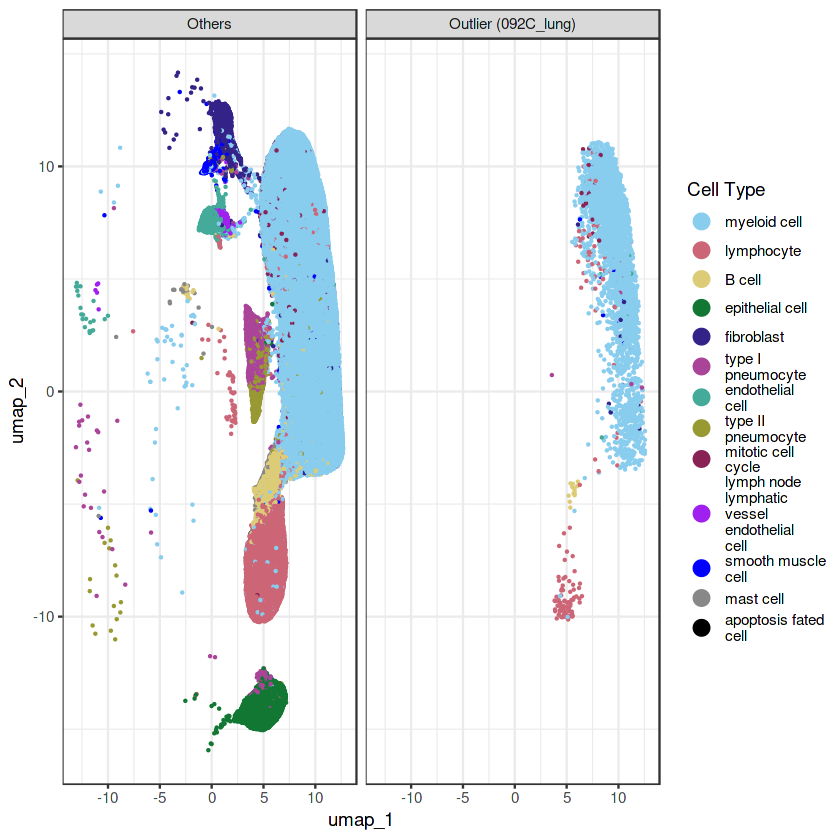

In [22]:

ggplot(subplot, aes(x = umap_1, y = umap_2)) +
  geom_point(aes(col= CellType), size = 0.2) +
  scale_color_manual(values = c(safe_colorblind_palette,colorBlindBlack8 ))+
  facet_wrap(~target)+
  theme_bw()+
  guides(colour = guide_legend(override.aes = list(size=4),
                               title = "Cell Type")) 

In [29]:
png("../../results/fig_revise/umap_fabrelung_outlier.png",width =620 , height = 600)
ggplot(subplot, aes(x = umap_1, y = umap_2)) +
  geom_point(aes(col= CellType), size = 0.2) +
  scale_color_manual(values = c(safe_colorblind_palette,colorBlindBlack8 ))+
  facet_wrap(~target)+
  theme_bw()+
  guides(colour = guide_legend(override.aes = list(size=4)))  +
    theme(text=element_text(size=15),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15),
         legend.position = "bottom")+
xlab("UMAP1") +
ylab("UMAP2")
dev.off()

png 
  2

In [135]:
plot_df = readRDS("../../data/Processed_Datasets/fabreLung/metadata/fabreLung_default_metadata.Rds")
meta <- unique(plot_df[, c("group", "sample", "batch")])
meta$batch <- str_to_title(meta$batch)
meta$group <- str_to_title(meta$group)
#meta$batch <- ifelse(meta$batch == "Morse", "Morse et al (2019)",
#                    ifelse(meta$batch == "Reyfman", "Reyfman et al (2019)",
#                          ifelse(meta$batch == "Valenzi", "Valenzi et al (2019)",
#                                ifelse(meta$batch == "Tatsuya", "Tsukui et al (2020)",
#                                      ifelse(meta$batch == "Habermann", "Habermann et al (2020)",
#                                            ifelse(meta$batch == "Adams", "Adams et al (2020)", "?"))))))


In [136]:
plot_df$CellType = str_wrap(plot_df$cell_type__ontology_label,20)
test <- get_proportion(meta, plot_df, "batch", "CellType", "sample")

In [143]:
unique(plot_df$CellType)
levels(test[[2]]$CellType)

[1] "lymphocyte"                                    
 [2] "myeloid cell"                                  
 [3] "endothelial cell"                              
 [4] "smooth muscle cell"                            
 [5] "B cell"                                        
 [6] "mitotic cell cycle"                            
 [7] "type I pneumocyte"                             
 [8] "epithelial cell"                               
 [9] "fibroblast"                                    
[10] "type II pneumocyte"                            
[11] "lymph node lymphatic\nvessel endothelial\ncell"
[12] "mast cell"                                     
[13] "apoptosis fated cell"

[1] "myeloid cell"                                  
 [2] "lymphocyte"                                    
 [3] "type II pneumocyte"                            
 [4] "type I pneumocyte"                             
 [5] "fibroblast"                                    
 [6] "endothelial cell"                              
 [7] "epithelial cell"                               
 [8] "B cell"                                        
 [9] "smooth muscle cell"                            
[10] "mast cell"                                     
[11] "lymph node lymphatic\nvessel endothelial\ncell"
[12] "mitotic cell cycle"                            
[13] "apoptosis fated cell"

In [139]:
group.colors <- c(safe_colorblind_palette,colorBlindBlack8)[1:13]
names(group.colors) = sort(unique(plot_df$CellType))

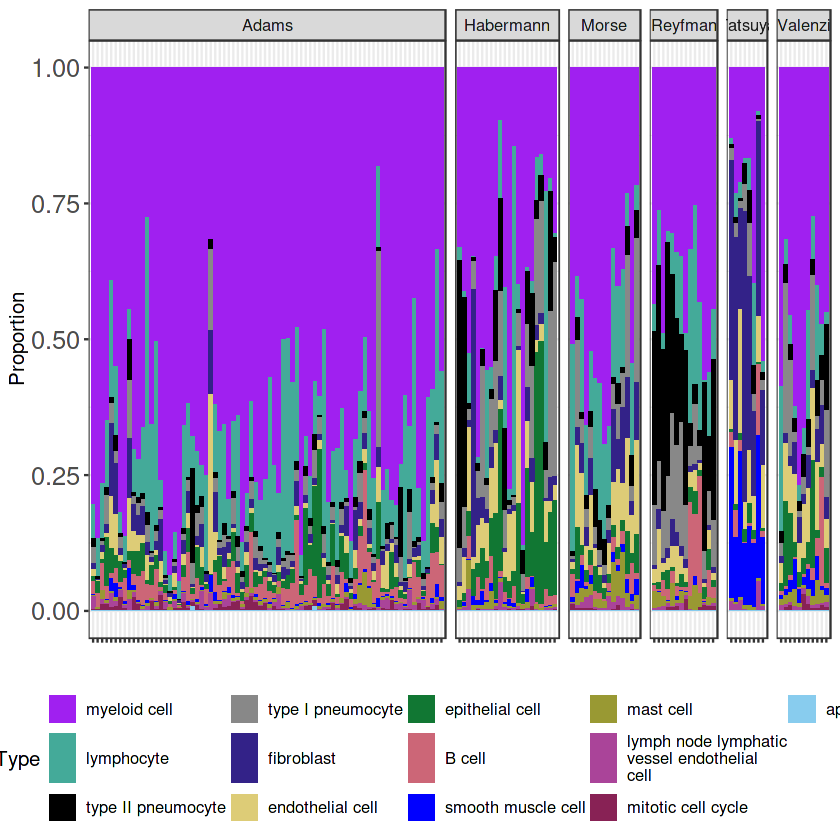

In [140]:
ggplot(data=test[[2]], aes(x=factor(new_id, levels = unique(test[[2]]$new_id)), y = ClusterProp, fill=CellType)) +
    geom_bar(stat="identity") + 
    facet_grid(~batch, scale = "free", space='free', labeller = label_wrap_gen(width=5)) +
    xlab("Sample") + ylab("Proportion") +
    scale_fill_manual(values = c(safe_colorblind_palette,colorBlindBlack8)) +
    theme_bw()+
    scale_x_discrete(expand = c(0, 1)) +
  theme(axis.text.x=element_blank(),
       text=element_text(size=12),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15),
       legend.position = "bottom") +
xlab("")

iLISI

In [12]:
pdf("../../results/fig_revise/fabreLung_cellprop.pdf", width = 10, height = 5)

ggplot(data=test[[2]], aes(x=factor(new_id, levels = unique(test[[2]]$new_id)), y = ClusterProp, fill=CellType)) +
    geom_bar(stat="identity") + 
    facet_grid(~batch, scale = "free", space='free', labeller = label_wrap_gen(width=5)) +
    xlab("Sample") + ylab("Proportion") +
    scale_fill_manual(values = c(safe_colorblind_palette,colorBlindBlack8)) +
    theme_bw()+
    scale_x_discrete(expand = c(0, 1)) +
  theme(axis.text.x=element_blank(),
       text=element_text(size=12),
          axis.title.x = element_text(vjust = 0.1),
          axis.text=element_text(size = 15),
       legend.position = "bottom") +
xlab("")
dev.off()

png 
  2

In [49]:
load("../../results/BatchStudy/COVID143_kbetlisi.Rda")
test = melt(lisi_df)
test$Correction = unlist(lapply(str_split(test$variable, "_"), function(x) x[1]))
test$Correction = factor(test$Correction, levels= unique(test$Correction))
test$Group = unlist(lapply(str_split(test$variable, "_"), function(x) x[2]))
test$Group = ifelse(test$Group == "Status", "Group", ifelse( test$Group == "Site","Batch", "Sample"))

No id variables; using all as measure variables



In [10]:
table(test$Correction)


            PCA Harmony, Sample  Harmony, Batch            ScVI    ScVI, Sample 
        1872975         1872975         1872975         1872975         1872975 
     ScVI,Batch 
        1872975 

In [50]:
test = test[test$Correction %in% c("PCA", "Harmony, Sample", "Harmony, Batch"),]
test = test[test$Group != "Sample",]

In [53]:
pdf("../../results/fig_revise/COVID143_ilsi.pdf", width = 5, height = 5)
ggplot(test, aes(x = Correction, y = value, group = variable)) +
geom_boxplot()+
facet_wrap(~Group, scale = "free_y") +
  theme(text = element_text(size = 20),
        axis.text.x = element_text(angle = 45, hjust=1))+
xlab("")
dev.off()

png 
  2

In [63]:
meta = readRDS("../../data/Processed_Datasets/stephensonCOVIDPBMC/metadata/stephensonCOVIDPBMC_default_metadata.Rds")
meta$sample = as.character(meta$sample)
meta$batch = as.character(meta$batch)
meta$Status = as.character(meta$Status)
meta <- unique(meta[, c("patient", "Status", "sample", "batch")])
sub_id <- which(meta$Status %in% c("Covid", "Healthy"))


In [64]:
sub_meta <- meta[sub_id,]
table(sub_meta$Status)


  Covid Healthy 
    102      24 

In [90]:
load("../../results/BatchStudy/mofa_test_covid143.Rda")
#meta$sample <- paste0(substr(meta$batch_id,1,nchar(meta$batch_id)-3), ".", meta$Processing_Cohort)
all_factors <- MOFAcellulaR::get_tidy_factors(model = model,
                                 metadata = meta,
                                 factor = "all",
                                 sample_id_column = "sample")

In [91]:


data_wide <-  spread(all_factors, Factor, value)

mofa_dist <- as.matrix(dist(data_wide[,5:9]))
rownames(mofa_dist) <- colnames(mofa_dist) <- data_wide$sample

In [33]:
pdf("../../results/fig_revise/covid_mofa.pdf", width = 7, height = 6)

ggplot(data_wide, aes(x = Factor1, y = Factor2)) +
geom_point(aes(col = Status, shape = batch), size = 3)+
    theme_bw() +
    scale_shape_manual(values=c(16, 7,3))+
  theme(text = element_text(size = 25),legend.position = "none",
        axis.title.x = element_text(vjust = -1),
        plot.margin = unit(c(0.5,0.5,1,0.5),"cm"))+
  labs(color = "Status", shape = "Site")+
  scale_color_manual(values =colorBlindBlack8[-4])+
 guides(color = guide_legend(order = 1),
          shape = guide_legend(order=2)   
          )


dev.off()


png 
  2

In [81]:
meta = readRDS("../../data/Processed_Datasets/stephensonCOVIDPBMC/metadata/stephensonCOVIDPBMC_default_metadata.Rds")
meta$sample = as.character(meta$sample)
meta$batch = as.character(meta$batch)
meta$Status = as.character(meta$Status)
meta <- unique(meta[, c("patient", "Status", "sample", "batch")])
sub_id <- which(meta$Status %in% c("Covid", "Healthy"))
sub_meta <- meta[sub_id,]

In [93]:
load("../../results/BatchStudy/mofa_test_covid143_sub.Rda")
#meta$sample <- paste0(substr(meta$batch_id,1,nchar(meta$batch_id)-3), ".", meta$Processing_Cohort)
all_factors <- MOFAcellulaR::get_tidy_factors(model = model,
                                 metadata = sub_meta,
                                 factor = "all",
                                 sample_id_column = "sample")

In [94]:

data_wide <-  spread(all_factors, Factor, value)

mofa_dist <- as.matrix(dist(data_wide[,5:9]))
rownames(mofa_dist) <- colnames(mofa_dist) <- data_wide$sample

In [95]:
table(data_wide$Status)


  Covid Healthy 
    102      24 

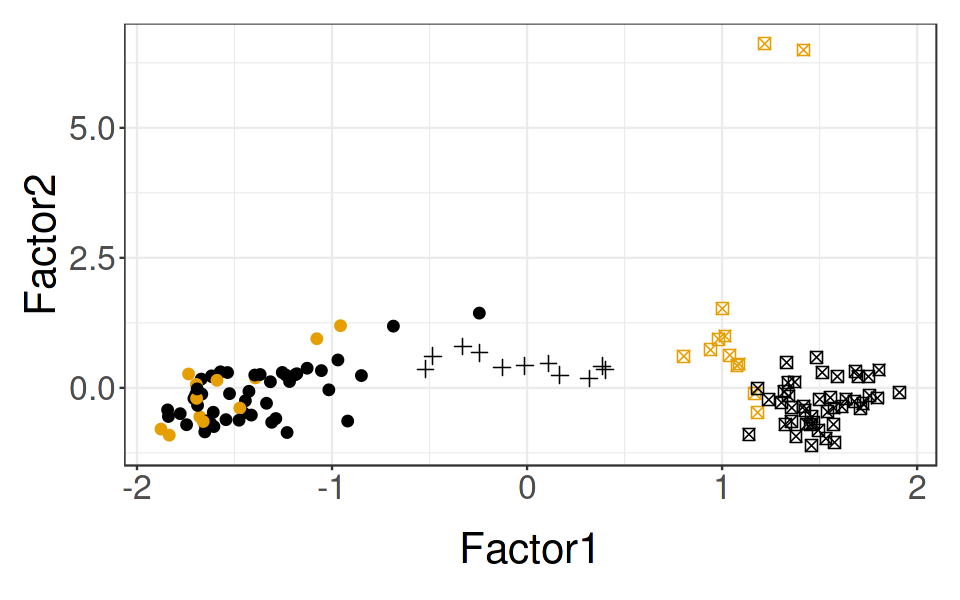

In [96]:
ggplot(data_wide, aes(x = Factor1, y = Factor2)) +
geom_point(aes(col = Status, shape = batch), size = 3)+
    theme_bw() +
    scale_shape_manual(values=c(16, 7,3))+
  theme(text = element_text(size = 25),legend.position = "none",
        axis.title.x = element_text(vjust = -1),
        plot.margin = unit(c(0.5,0.5,1,0.5),"cm"))+
  labs(color = "Status", shape = "Site")+
  scale_color_manual(values =colorBlindBlack8[-4])+
 guides(color = guide_legend(order = 1),
          shape = guide_legend(order=2)   
          )


In [97]:
pdf("../../results/fig_revise/covid_mofa_sub.pdf", width = 7, height = 6)

ggplot(data_wide, aes(x = Factor1, y = Factor2)) +
geom_point(aes(col = Status, shape = batch), size = 3)+
    theme_bw() +
    scale_shape_manual(values=c(16, 7,3))+
  theme(text = element_text(size = 25),legend.position = "none",
        axis.title.x = element_text(vjust = -1),
        plot.margin = unit(c(0.5,0.5,1,0.5),"cm"))+
  labs(color = "Status", shape = "Site")+
  scale_color_manual(values =colorBlindBlack8[-4])+
 guides(color = guide_legend(order = 1),
          shape = guide_legend(order=2)   
          )


dev.off()

png 
  2

In [59]:
meta = readRDS("../../data/Processed_Datasets/stephensonCOVIDPBMC/metadata/stephensonCOVIDPBMC_default_metadata.Rds")
meta$sample = as.character(meta$sample)
meta$batch = as.character(meta$batch)

meta <- unique(meta[, c("patient", "Status", "sample", "batch")])
load("../../results/pseudobulk/pseudobulk_COVID143.Rda")
plot_df$orig.ident = as.character(plot_df$orig.ident)
plot_df$batch = meta$batch
plot_df$group = meta$Status


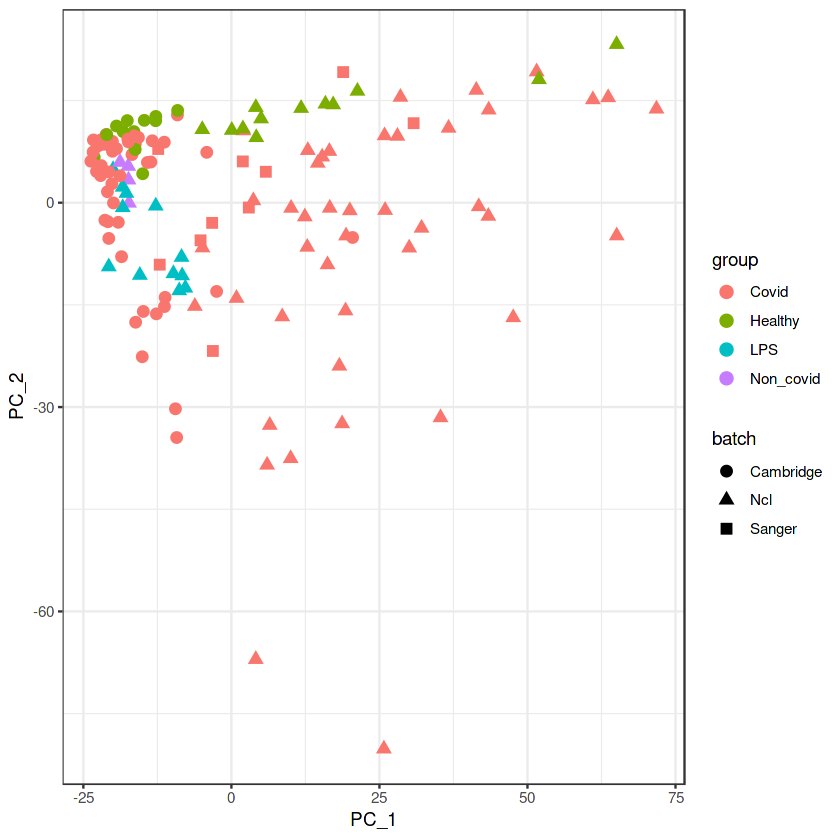

In [24]:
ggplot(plot_df, aes(x = PC_1, y = PC_2)) +
geom_point(aes(col = group, shape = batch),size = 3) +
theme_bw()

In [35]:
pdf("../../results/fig_revise/covid_pseu.pdf", width = 7, height = 6)

ggplot(plot_df, aes(x = PC_1, y = PC_2)) +
geom_point(aes(col = group, shape = batch),size = 3) +
theme_bw()+
    scale_shape_manual(values=c(16, 7,3))+
  theme(text = element_text(size = 25),legend.position = "none",
        axis.title.x = element_text(vjust = -1),
        plot.margin = unit(c(0.5,0.5,1,0.5),"cm"))+
  labs(color = "Status", shape = "Site")+
  xlab("PC1")+
  ylab("PC2")+
  scale_color_manual(values =colorBlindBlack8[-4])+
 guides(color = guide_legend(order = 1),
          shape = guide_legend(order=2)   
          )


dev.off()

png 
  2

In [98]:
load("../../results/pseudobulk/pseudobulk_COVID143_sub.Rda")
plot_df$orig.ident = as.character(plot_df$orig.ident)


In [103]:
head(meta)

,patient,Status,sample,batch
,<fct>,<chr>,<chr>,<chr>
MH9179824,MH9179824,Covid,MH9179824,Ncl
newcastle65,newcastle65,Healthy,newcastle65,Ncl
MH9143327,MH9143327,Covid,MH9143327,Ncl
MH9143326,MH9143326,Covid,MH9143326,Ncl
MH9143325,MH9143325,Covid,MH9143325,Ncl
MH9143320,MH9143320,Covid,MH9143320,Ncl


In [104]:
head(plot_df)
rownames(meta) = meta$sample
meta_sub <- meta[rownames(plot_df),]
plot_df$batch = meta_sub$batch
plot_df$group = meta_sub$Status

,orig.ident,nCount_RNA,nFeature_RNA,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,⋯,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MH9179824,MH9179824,42332812,18609,12.73862,-6.852432,3.265548,-6.126099,-4.31465211,1.452677,5.467217,⋯,-4.688966,-4.7653930,0.1385082,0.974164,-3.9253902,3.4939748,-3.3442544,-3.538179,-2.49228667,-0.7253776
newcastle65,newcastle65,35550183,18434,5.28637,12.389387,12.338732,-2.913039,3.60519082,4.391115,4.820944,⋯,0.582621,0.6971149,-4.9643975,-2.165839,3.4428653,-1.7928654,-0.4163706,6.139978,-6.94831906,-3.6711278
MH9143327,MH9143327,56261720,18780,43.15768,-2.461282,-12.047833,3.419323,-10.30539148,2.335506,5.300826,⋯,1.795059,2.1915917,-3.2457054,3.551026,2.2629571,-0.7865576,-1.5636063,4.506170,-3.65760981,1.7890297
MH9143326,MH9143326,48565095,17848,43.14125,13.102270,-18.976564,-1.282128,-5.60782711,8.226325,1.759747,⋯,-2.866071,3.9053105,2.0399334,2.192636,0.8997141,-0.4291624,0.5093486,2.191266,-0.02428205,0.1327992
MH9143325,MH9143325,29906466,17491,14.66345,5.750651,-10.859357,2.269779,4.69089567,8.499717,3.620042,⋯,1.740335,0.7401021,-2.5473922,2.134207,2.2200387,0.9156706,-1.4494323,2.093682,0.62539826,1.7806161
MH9143320,MH9143320,36460091,18341,10.22253,-37.530705,4.379341,7.234519,-0.02910636,0.130092,5.198740,⋯,-5.813746,-5.3295629,-5.5764131,-3.081644,4.1156880,-1.3454030,-4.1693270,6.254921,-4.49798767,-5.8444384


In [105]:
pdf("../../results/fig_revise/covid_pseu_sub.pdf", width = 7, height = 6)

ggplot(plot_df, aes(x = PC_1, y = PC_2)) +
geom_point(aes(col = group, shape = batch),size = 3) +
theme_bw()+
    scale_shape_manual(values=c(16, 7,3))+
  theme(text = element_text(size = 25),legend.position = "none",
        axis.title.x = element_text(vjust = -1),
        plot.margin = unit(c(0.5,0.5,1,0.5),"cm"))+
  labs(color = "Status", shape = "Site")+
  xlab("PC1")+
  ylab("PC2")+
  scale_color_manual(values =colorBlindBlack8[-4])+
 guides(color = guide_legend(order = 1),
          shape = guide_legend(order=2)   
          )


dev.off()

png 
  2

In [52]:
meta = readRDS("../../data/Processed_Datasets/perezLupus/metadata/perezLupus_default_metadata.Rds")
meta <- unique(meta[, c("patient", "group", "sample", "batch")])
levels(meta$group)[which(levels(meta$group) == "na")] = "normal"

load("../../results/pseudobulk/pseudobulk_perez.Rda")

rownames(plot_df) = str_replace(rownames(plot_df), "_", ".")
meta <- meta[match(rownames(plot_df), meta$sample),]
plot_df = cbind(plot_df, meta)
plot_df$group = str_to_title(plot_df$group)

load("../../results/BatchStudy/Perez2022_subgroup_meta.Rda")
meta$sample <- paste0(substr(meta$batch_id,1,nchar(meta$batch_id)-3), ".",meta$Processing_Cohort)
rownames(meta) = meta$sample

meta <- meta[as.character(plot_df$sample),]
plot_df$subgroup <- meta$subgroup


load("../../results/BatchStudy/mofa_test_perez.Rda")
#meta$sample <- paste0(substr(meta$batch_id,1,nchar(meta$batch_id)-3), ".", meta$Processing_Cohort)
all_factors <- MOFAcellulaR::get_tidy_factors(model = model,
                                 metadata = meta,
                                 factor = "all",
                                 sample_id_column = "sample")


library(tidyr)

data_wide <-  spread(all_factors, Factor, value)

mofa_dist <- as.matrix(dist(data_wide[,7:11]))
rownames(mofa_dist) <- colnames(mofa_dist) <- data_wide$sample
data_wide$group = factor(str_to_title(data_wide$disease_state))
levels(data_wide$group)[which(levels(data_wide$group) == "Na")] = "Normal"

In [54]:
plot_df$subgroup = factor(plot_df$subgroup)
levels(plot_df$subgroup) = c('1.0','2.0','3.0','4.1','4.2','4.3')

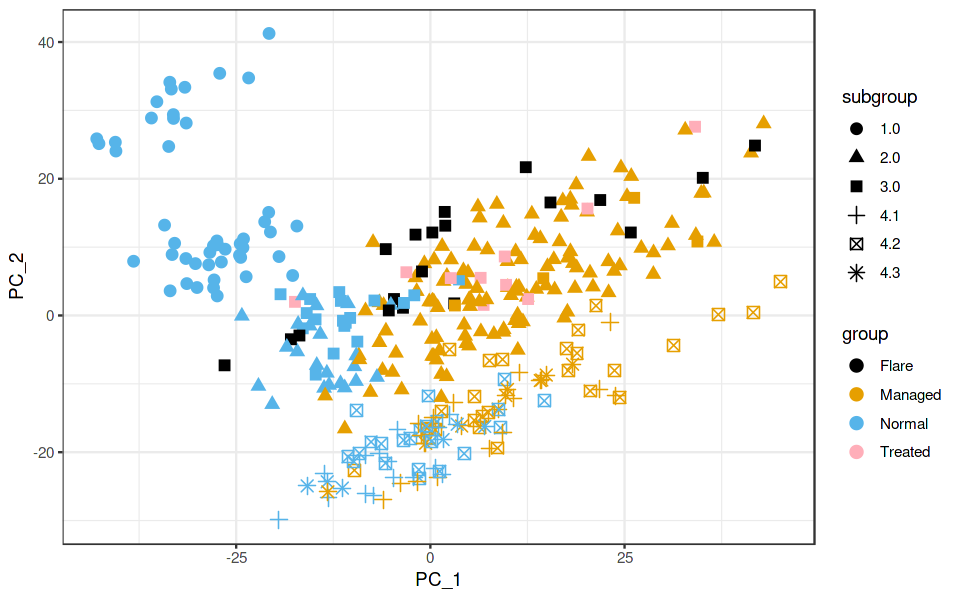

In [55]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(plot_df, aes(x = PC_1, y = PC_2))+
geom_point(aes(col = group, shape = subgroup), size = 3)+
theme_bw()+

  scale_color_manual(values =colorBlindBlack8)


In [56]:
pdf("../../results/fig_revise/perez_pseu.pdf", width = 8, height = 6)

ggplot(plot_df, aes(x = PC_1, y = PC_2))+
geom_point(aes(col = group, shape = subgroup), size = 3)+
theme_bw()+
  theme(text = element_text(size = 25),
        axis.title.x = element_text(vjust = -1),
        plot.margin = unit(c(0.5,0.5,1,0.5),"cm"))+
  labs(color = "Condition", shape = "Batch")+
xlab("PC1") +
ylab("PC2")+
  scale_color_manual(values =colorBlindBlack8[-4])

dev.off()

png 
  2

In [57]:
data_wide$subgroup = factor(data_wide$subgroup)
levels(data_wide$subgroup) = c('1.0','2.0','3.0','4.1','4.2','4.3')

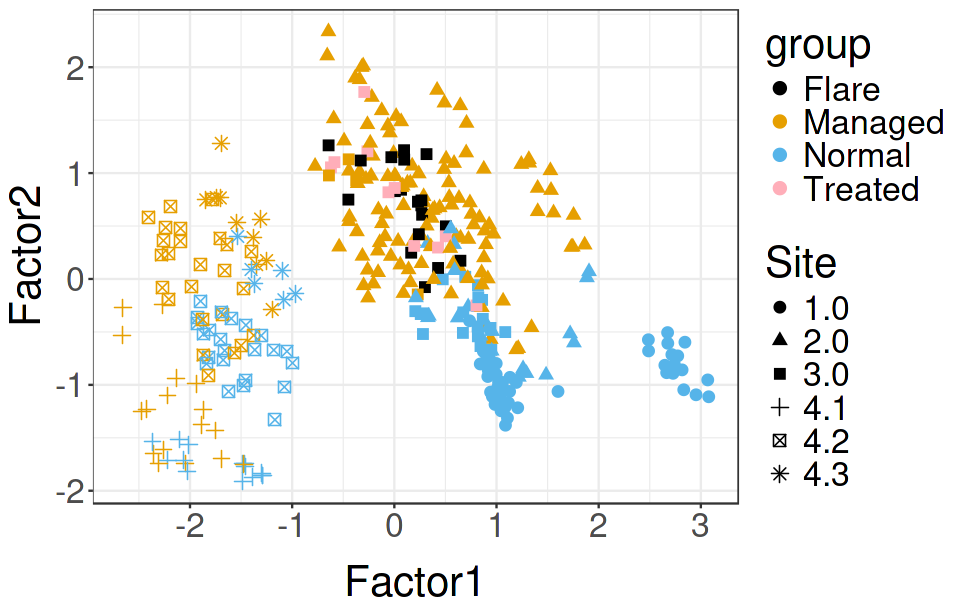

In [68]:


ggplot(data_wide, aes(x = Factor1, y = Factor2)) +
geom_point(aes(col = group, shape = subgroup), size = 3)+
theme_bw()+guides(shape = guide_legend(title = "Site")) +
  theme(text = element_text(size = 25),
        axis.title.x = element_text(vjust = -0.5))+

  scale_color_manual(values =colorBlindBlack8)

In [58]:
pdf("../../results/fig_revise/perez_mofa.pdf", width = 8, height = 6)

ggplot(data_wide, aes(x = Factor1, y = Factor2)) +
geom_point(aes(col = group, shape = subgroup), size = 3)+
theme_bw() +
  theme(text = element_text(size = 25),
        axis.title.x = element_text(vjust = -1),
        plot.margin = unit(c(0.5,0.5,1,0.5),"cm"))+
  labs(color = "Condition", shape = "Batch")+
  scale_color_manual(values =colorBlindBlack8[-4])

dev.off()

png 
  2

In [128]:
load("../../results/BatchStudy/Perez2022_methodcompare_ss.Rda")
load("../../results/BatchStudy/Perez2022_methodcompare_RO2.Rda")

In [131]:
ss_df_final$comb = as.character(ss_df_final$comb)
R_tmp_update$comb = as.character(R_tmp_update$comb)
ss_df_final = ss_df_final[ss_df_final$variable !="Batch, new",]
ss_df_final = ss_df_final[!(ss_df_final$comb%in% c("PILOT", "Proportion")),]
R_tmp_update = R_tmp_update[R_tmp_update$Group !="Batch, new",]
R_tmp_update = R_tmp_update[!(R_tmp_update$comb%in% c("PILOT", "Proportion")),]


In [133]:
ss_df_final$comb = factor(ss_df_final$comb, levels = unique(ss_df_final$comb))
R_tmp_update$comb = factor(R_tmp_update$comb, levels = unique(R_tmp_update$comb))

In [124]:
levels(R_tmp_update$comb)

character(0)

In [134]:
levels(ss_df_final$comb)[1:2]= levels(R_tmp_update$comb)[1:2] = c("PILOT", "GloProp")

In [139]:
levels(R_tmp_update$comb)[3:8] = levels(ss_df_final$comb)[3:8]

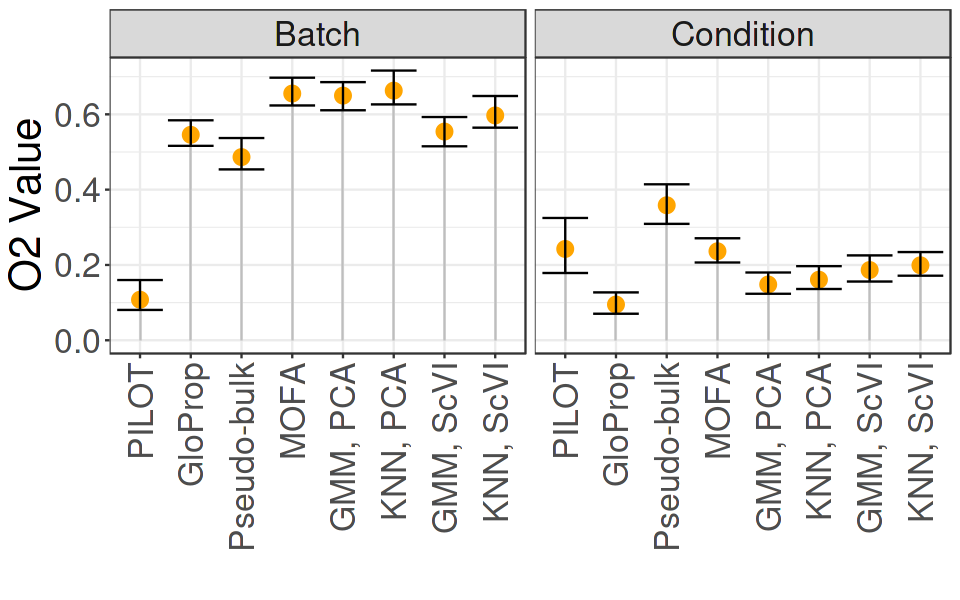

In [140]:


ggplot(R_tmp_update, aes(x = comb, y = Value))+
  geom_segment( aes(x=comb, xend=comb, y=0, yend=Value), color="grey")+
 geom_point( color="orange", size=4) +
  theme_bw() +      
  geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
facet_wrap(~Group)+
  ylab("O2 Value")+
xlab("")+
  theme(text = element_text(size = 25),
       axis.text.x = element_text(angle = 90, hjust=1, vjust = 0.5))

In [141]:
pdf("../../results/fig_revise/perez_methodcompare.pdf", width = 6.6, height = 6)

ggplot(R_tmp_update, aes(x = comb, y = Value))+
  geom_segment( aes(x=comb, xend=comb, y=0, yend=Value), color="grey")+
 geom_point( color="orange", size=4) +
  theme_bw() +      
  geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
facet_wrap(~Group)+
  ylab("ANOSIM Statistic")+
xlab("")+
  theme(text = element_text(size = 20),
        axis.title.x = element_text(vjust = -0.5),
       axis.text.x = element_text(angle = 90, hjust=1, vjust = 0.5))

dev.off()

png 
  2

In [116]:
pdf("../../results/fig_revise/perez_methodcompare_ss.pdf", width = 6.6, height = 6)

ggplot(ss_df_final, aes(x = comb, y = values))+
  geom_segment( aes(x=comb, xend=comb, y=0, yend=values), color="grey")+
 geom_point( color="orange", size=4) +
  theme_bw() +      
  geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
facet_wrap(~variable)+
  ylab("Silhouette Score")+
xlab("")+
  theme(text = element_text(size = 20),
        axis.title.x = element_text(vjust = -0.5),
       axis.text.x = element_text(angle = 90, hjust=1, vjust = 0.5))

dev.off()

png 
  2

In [142]:
load("../../results/BatchStudy/COVID143_methodcompare_ss.Rda")
load("../../results/BatchStudy/COVID143_methodcompare_RO2.Rda")

In [143]:
ss_df_final$comb = as.character(ss_df_final$comb)
R_tmp_update$comb = as.character(R_tmp_update$comb)
ss_df_final = ss_df_final[!(ss_df_final$comb%in% c("PILOT", "Proportion")),]
R_tmp_update = R_tmp_update[!(R_tmp_update$comb%in% c("PILOT", "Proportion")),]


In [144]:
ss_df_final$comb = factor(ss_df_final$comb, levels = unique(ss_df_final$comb))
R_tmp_update$comb = factor(R_tmp_update$comb, levels = unique(R_tmp_update$comb))

In [145]:
levels(ss_df_final$comb)[1:2]= levels(R_tmp_update$comb)[1:2] = c("PILOT", "GloProp")

In [147]:
levels(R_tmp_update$comb)[3:8] = levels(ss_df_final$comb)[3:8]

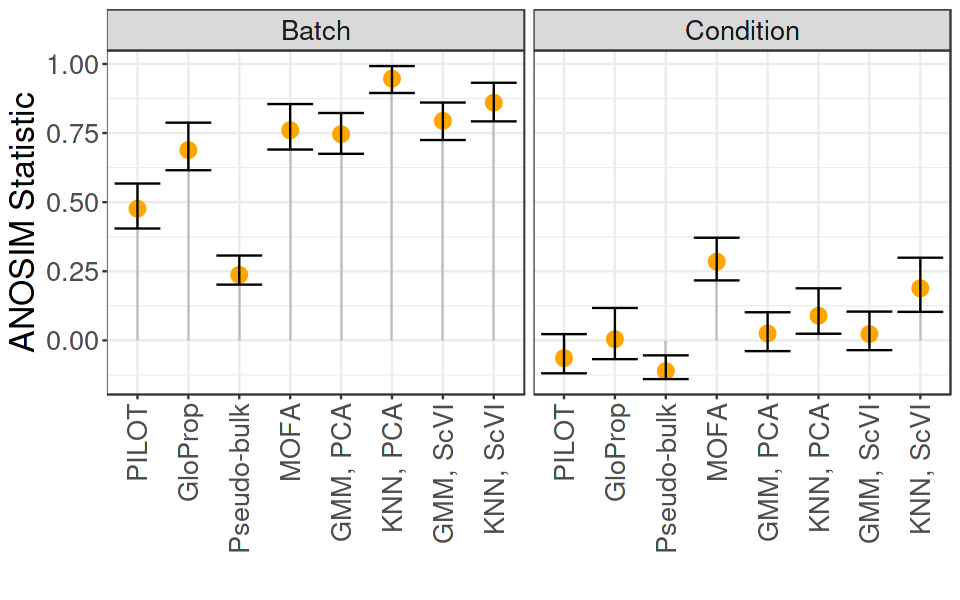

In [148]:
ggplot(R_tmp_update, aes(x = comb, y = Value))+
  geom_segment( aes(x=comb, xend=comb, y=0, yend=Value), color="grey")+
 geom_point( color="orange", size=4) +
  theme_bw() +      
  geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
facet_wrap(~Group)+
  ylab("ANOSIM Statistic")+
xlab("")+
  theme(text = element_text(size = 20),
        axis.title.x = element_text(vjust = -0.5),
       axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [149]:
pdf("../../results/fig_revise/COVID143_methodcompare.pdf", width = 6, height = 6)

ggplot(R_tmp_update, aes(x = comb, y = Value))+
  geom_segment( aes(x=comb, xend=comb, y=0, yend=Value), color="grey")+
 geom_point( color="orange", size=4) +
  theme_bw() +      
  geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
facet_wrap(~Group)+
  ylab("ANOSIM Statistic")+
xlab("")+
  theme(text = element_text(size = 20),
        axis.title.x = element_text(vjust = -0.5),
       axis.text.x = element_text(angle = 90, hjust=1, vjust = 0.5))

dev.off()

png 
  2

In [150]:
pdf("../../results/fig_revise/COVID143_methodcompare_ss.pdf", width = 6, height = 6)

ggplot(ss_df_final, aes(x = comb, y = values))+
  geom_segment( aes(x=comb, xend=comb, y=0, yend=values), color="grey")+
 geom_point( color="orange", size=4) +
  theme_bw() +      
  geom_errorbar(aes(ymin =Low.qt, ymax = High.qt))+
facet_wrap(~variable)+
  ylab("Silhouette Score")+
xlab("")+
  theme(text = element_text(size = 20),
        axis.title.x = element_text(vjust = -0.5),
       axis.text.x = element_text(angle = 90, hjust=1, vjust = 0.5))

dev.off()

png 
  2